<a href="https://colab.research.google.com/github/Mindgaze/Lighthouse-Desafio-Ci-ncia-de-Dados-2024-9/blob/main/C_LH_CD_FILIPE_DO_NASCIMENTO_RODRIGUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Cientista de Dados-Programa Light House

In [23]:

### Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels as sts
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, spearmanr, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from google.colab import drive
import joblib
!!pip freeze > requirements.txt



[]

In [2]:
###Importar base de Dados
from google.colab import drive
drive.mount('/content/drive')
IMDB = pd.read_csv('/content/drive/MyDrive/Cópia de desafio_indicium_imdb.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Desafio 1

Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas.

**Etapa 0: Overview**

Busca um contato incial com a base de dados e obtenção de algumas metricas gerais.

In [3]:
drive.mount('/content/drive')
IMDB = pd.read_csv('/content/drive/MyDrive/Cópia de desafio_indicium_imdb.csv')

print(IMDB)
IMDB.info()
print(IMDB.isnull().sum())
IMDB.count()
IMDB.describe(include='all')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Unnamed: 0                                   Series_Title Released_Year  \
0             1                                  The Godfather          1972   
1             2                                The Dark Knight          2008   
2             3                         The Godfather: Part II          1974   
3             4                                   12 Angry Men          1957   
4             5  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
994         995                         Breakfast at Tiffany's          1961   
995         996                                          Giant          1956   
996         997                          From Here to Eternity          1953   
997         998                                       Lifeboat         

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999.000000,999,999,898,999,999,999.000000,999,842.000000,999,999,999,999,999,9.990000e+02,830
unique,NaN,998,100,16,140,202,NaN,999,NaN,548,659,840,890,938,NaN,822
top,NaN,Drishyam,2014,U,130 min,Drama,NaN,An organized crime dynasty's aging patriarch t...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,NaN,2,32,234,23,84,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,500.000000,NaN,NaN,NaN,NaN,NaN,7.947948,NaN,77.969121,NaN,NaN,NaN,NaN,NaN,2.716214e+05,NaN
std,288.530761,NaN,NaN,NaN,NaN,NaN,0.272290,NaN,12.383257,NaN,NaN,NaN,NaN,NaN,3.209126e+05,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,250.500000,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.547150e+04,NaN
50%,500.000000,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.383560e+05,NaN
75%,749.500000,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.731675e+05,NaN


**Etapa 1: Transformações Preliminares**

Observa-se que as colunas  Runtime , gross e year added constan como objetos mas seria mais proveitosos trata-las como um valores numericos(float), nos dois primeiros  e data no terceiro. Portanto é interesante mudar o tipo dessas colunas.

A base encontra-se com muitos valores nulos ou faltantes, especialmente na categoria  Meta_score, Gross e Certicate. Preenchirei tais valores NaN para facilitar entendimento, transformações posteriores visando regresão e preservar o maximo da base de dados que é pequena.

Eliminarei a coluna Unnamed e Overview.Ademais farei uma copia do dataframe que recebera um tratamento posterior.



In [4]:
# Transformar colunas Runtime e Gross em float e Released_Year em datetime
IMDB['Runtime'] = IMDB['Runtime'].str.extract('(\d+)').astype(float)
IMDB['Gross'] = IMDB['Gross'].str.replace(',', '').astype(float)
IMDB['Released_Year'] = pd.to_datetime(IMDB['Released_Year'], errors='coerce').dt.year

# Preencher valores faltantes
IMDB['Meta_score'].fillna(np.nan, inplace=True)
IMDB['Gross'].fillna(np.nan, inplace=True)
IMDB['Certificate'].fillna(np.nan, inplace=True)

# Eliminar colunas Unnamed e Overview
IMDB.drop(columns=['Unnamed: 0', 'Overview'], inplace=True)

# Checando as transformações
print(IMDB.info())
print(IMDB.head())

IMDB_transformado = IMDB.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 109.4+ KB
None
                                    Series_Title  Released_Year Certificate  \
0                                  The Godf

**Etapa 2: Transformações de dados categoricos**

Alguns dados categricos tais como estrelas do filme podem ter impactos significativos especialmente no que tange rating e faturamento.É nescesssario ultilizar de tecnicas de  codificação para realizar tais transformações.

Optei pela tecnica de Target Encoding (ou Mean Encoding) na qual   cada categoria é substituída pela média do target (variável dependente) para essa categoria. Devido a sua adequação a problemas de regressão e pelo fato de ser baseada na média da variável dependente, possibilitando incorporar informações valiosas sobre a relação entre a variável categórica e o target. Ademais o target encoding mantém  contribui para um modelo mais leve.

In [5]:
# Label Encoding para colunas categóricas
label_enc_columns = ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

label_encoders = {}
for col in label_enc_columns:
    le = LabelEncoder()
    IMDB_transformado[col] = le.fit_transform(IMDB_transformado[col].astype(str))
    label_encoders[col] = le

# Target Encoding (Mean Encoding) para colunas categóricas
target_enc_columns = ['Series_Title', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in target_enc_columns:
    mean_encoding = IMDB_transformado.groupby(col)['IMDB_Rating'].mean()
    IMDB_transformado[col + '_mean_encoded'] = IMDB_transformado[col].map(mean_encoding)


**Etapa 3: Analise Grafica**

Nesta etapa optei por focalizar as variaveis "Gross" e IMDB_Rating. Para obtenção de insghts a nivel macro acerca do data set tais como avaliação visual possivel  de Linearidade,assim como Normalidade e Tonicidade. Para Insights a nivel mais Micro foram ultilizados graficos de Barras.




*Grafico de Barras: Faturamento*

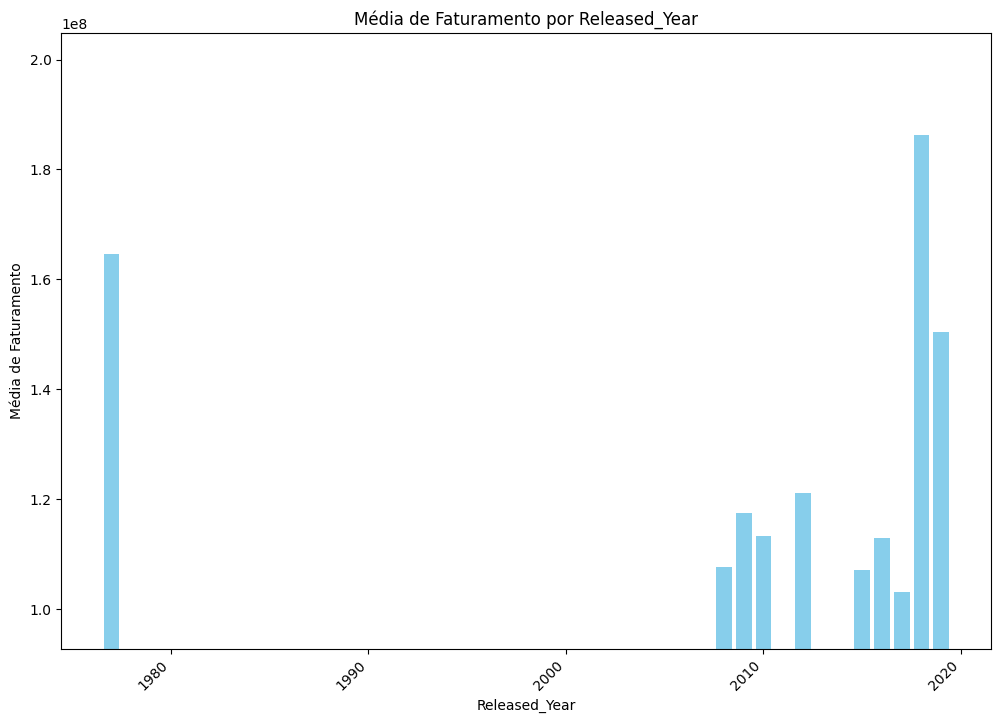

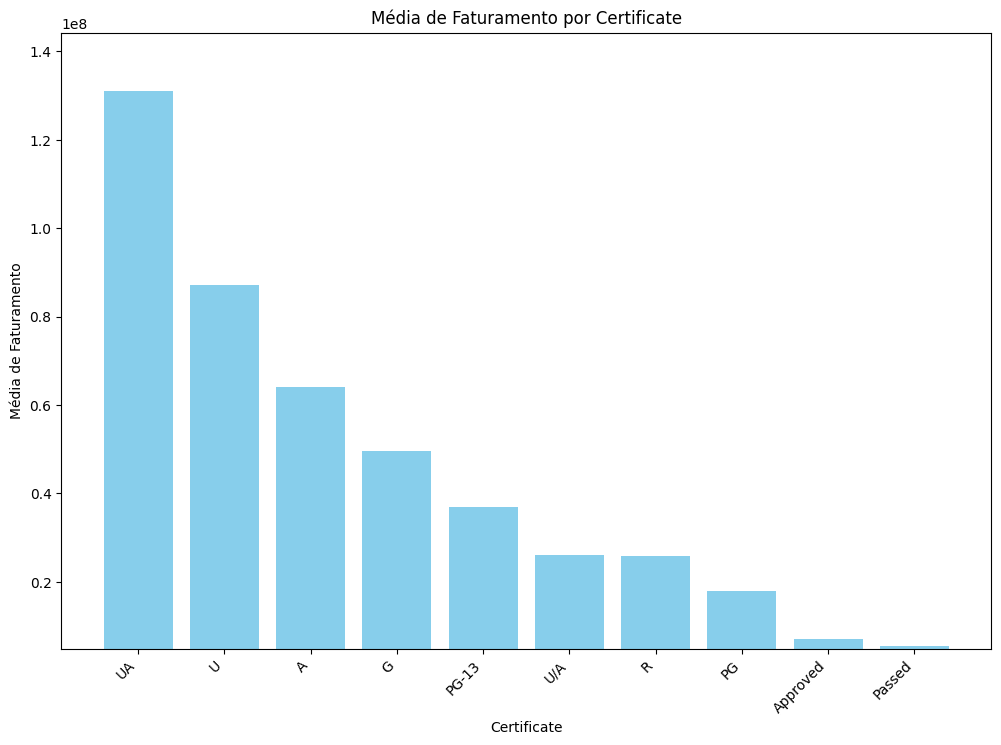

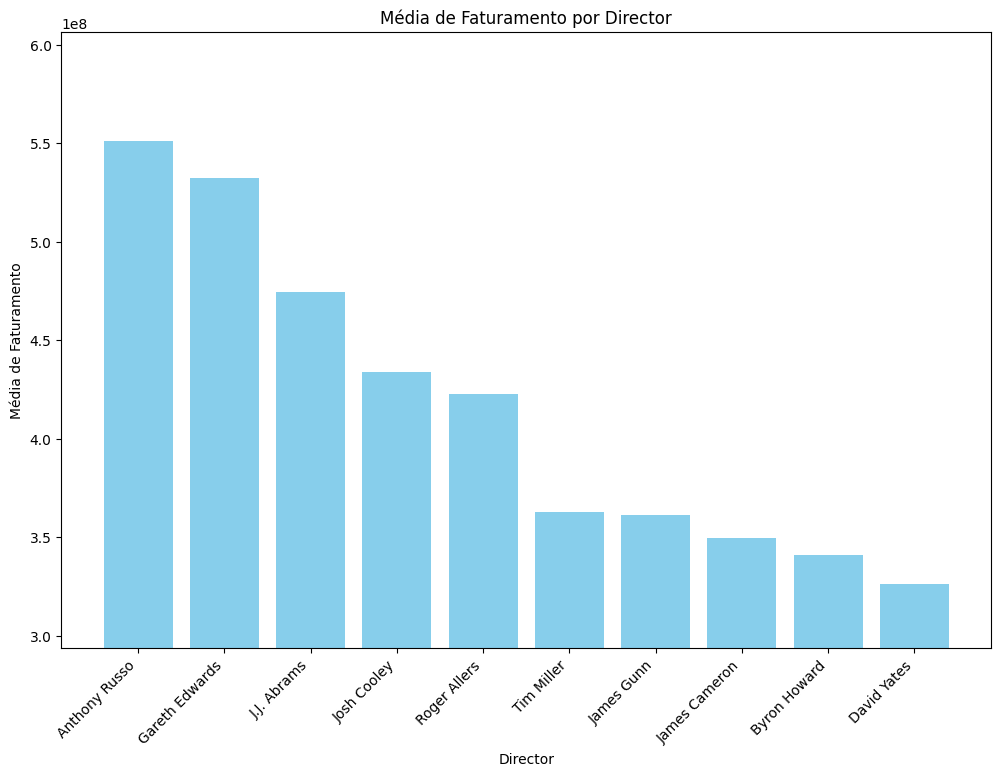

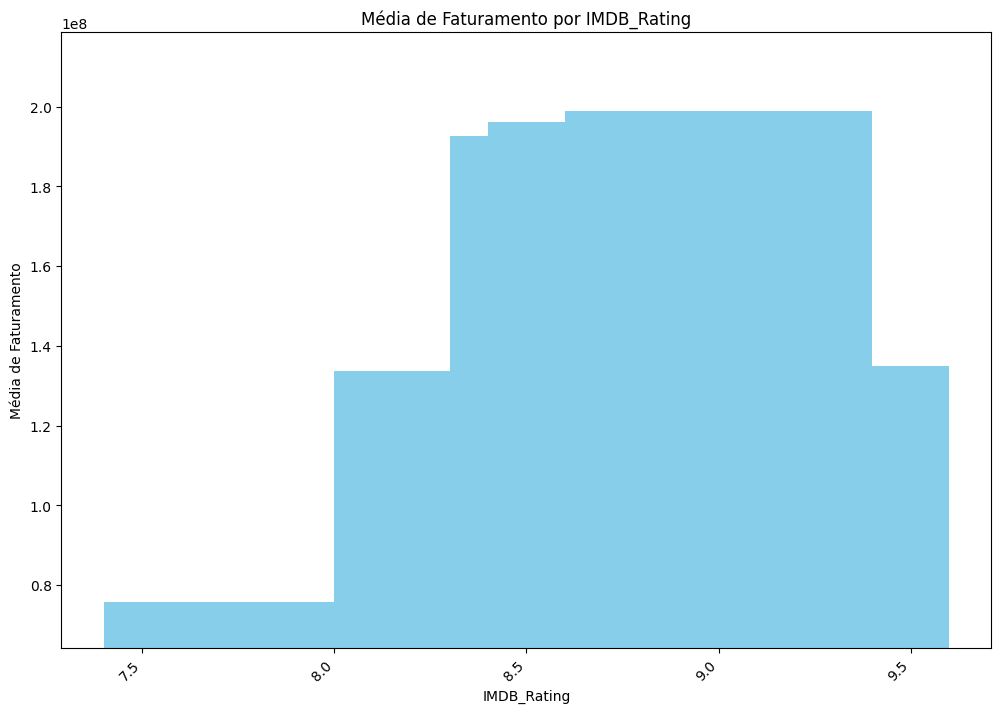

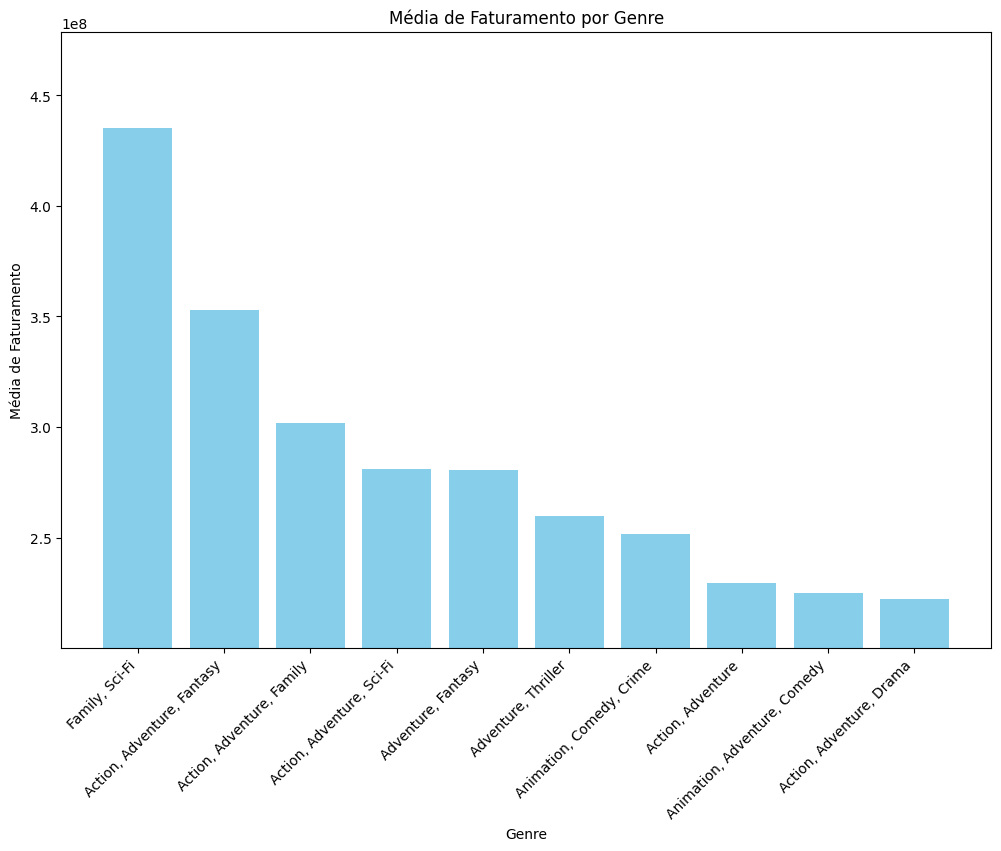

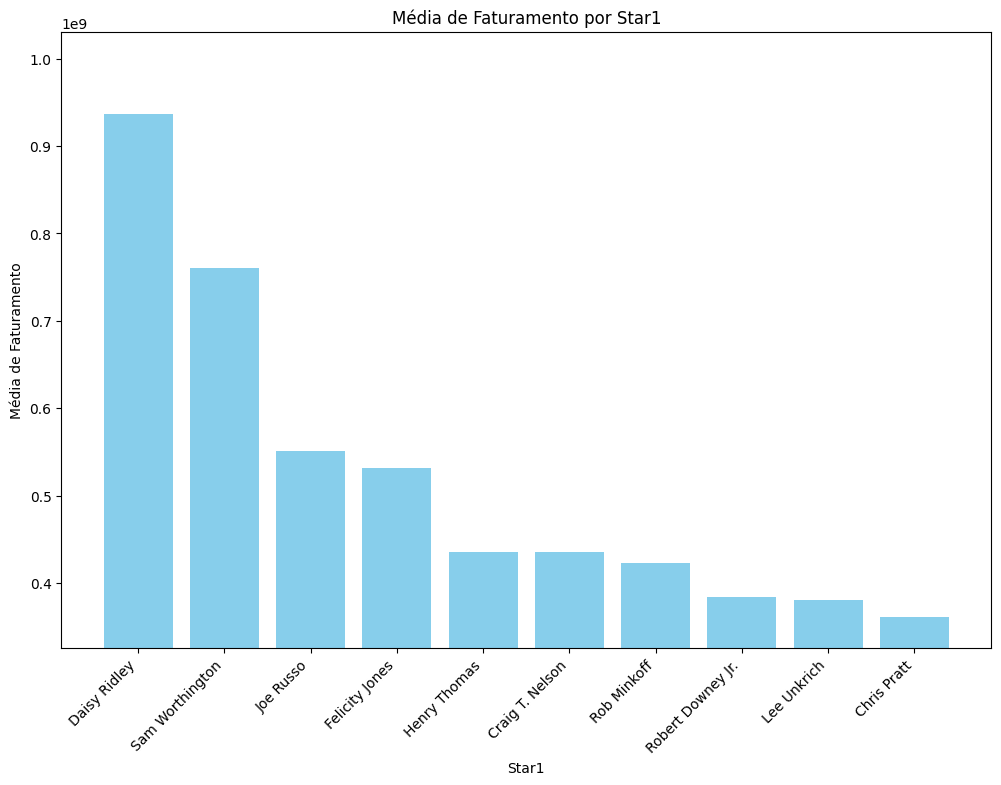

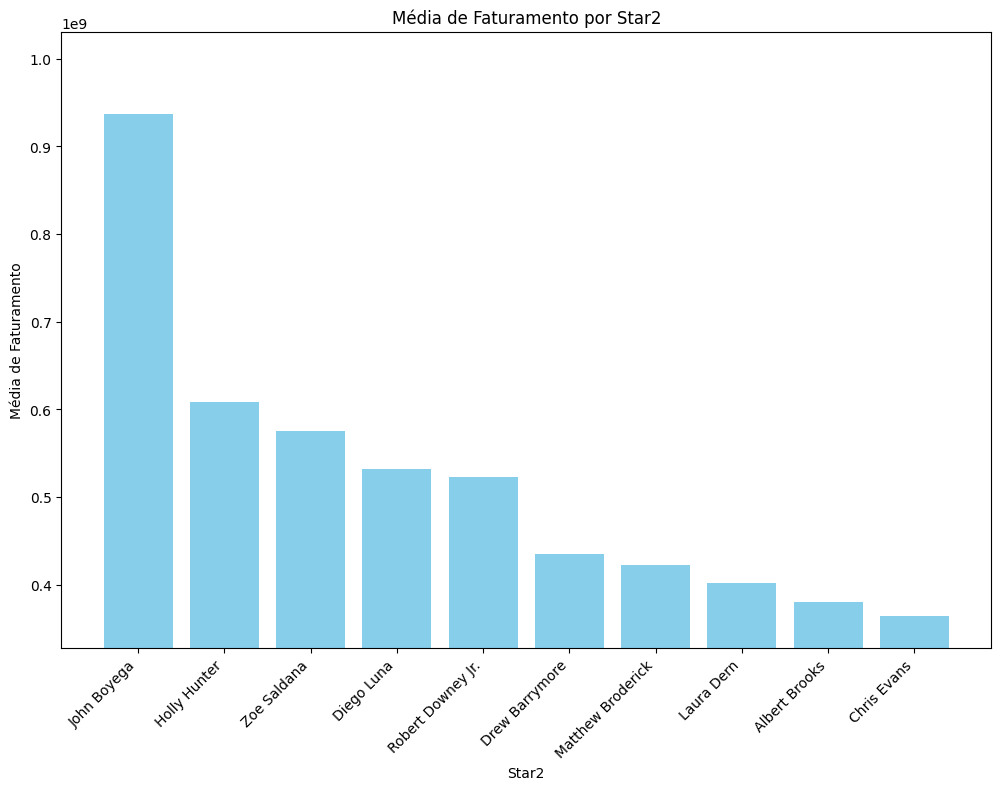

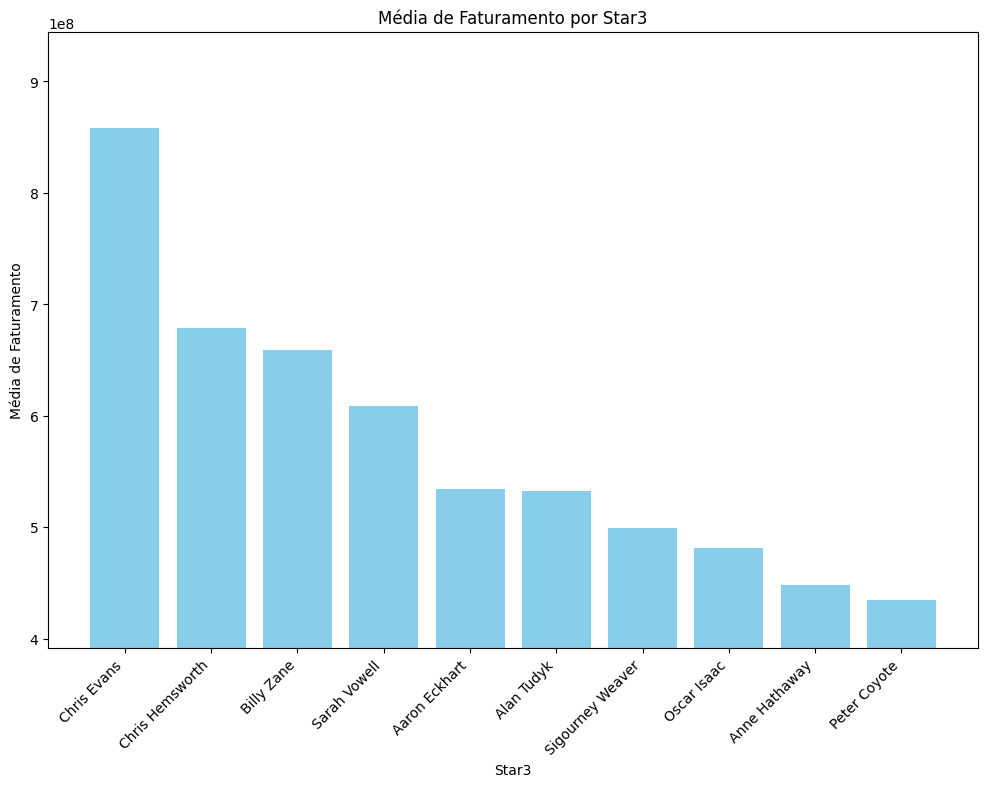

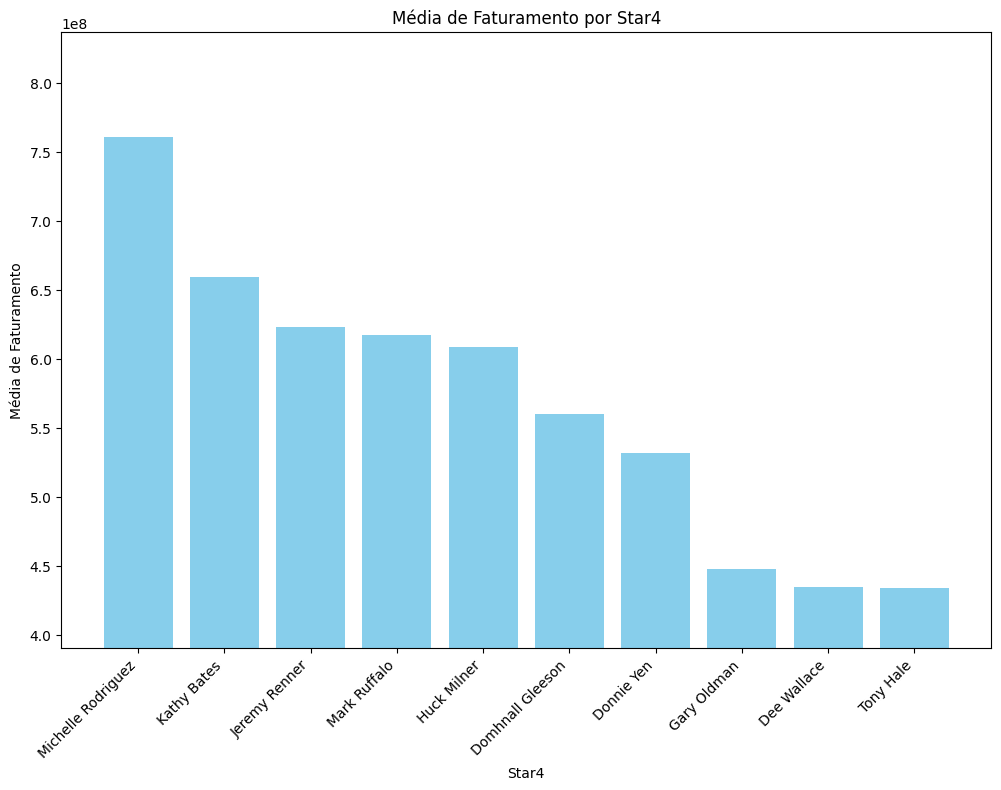

In [6]:
# Função para plotar o gráfico de barras
def plot_mean_gross_by_category(category, top_n=10):
    mean_gross = IMDB.groupby(category)['Gross'].mean().sort_values(ascending=False)
    top_categories = mean_gross.head(top_n)

    plt.figure(figsize=(12, 8))
    plt.bar(top_categories.index, top_categories.values, color='skyblue')
    plt.title(f'Média de Faturamento por {category}')
    plt.xlabel(category)
    plt.ylabel('Média de Faturamento')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(min(top_categories.values) - 0.1 * min(top_categories.values),
             max(top_categories.values) + 0.1 * max(top_categories.values))
    plt.show()

# Aplicar para diferentes categorias
categories = [ 'Released_Year', 'Certificate', 'Director', 'IMDB_Rating',
              'Genre', 'Star1', 'Star2', 'Star3', 'Star4']

for category in categories:
    plot_mean_gross_by_category(category, top_n=10)

*Devido a uma questão de escla o grafico FaturamentoX NUmero de Votos teve que ter um processo de scaling especifico. *

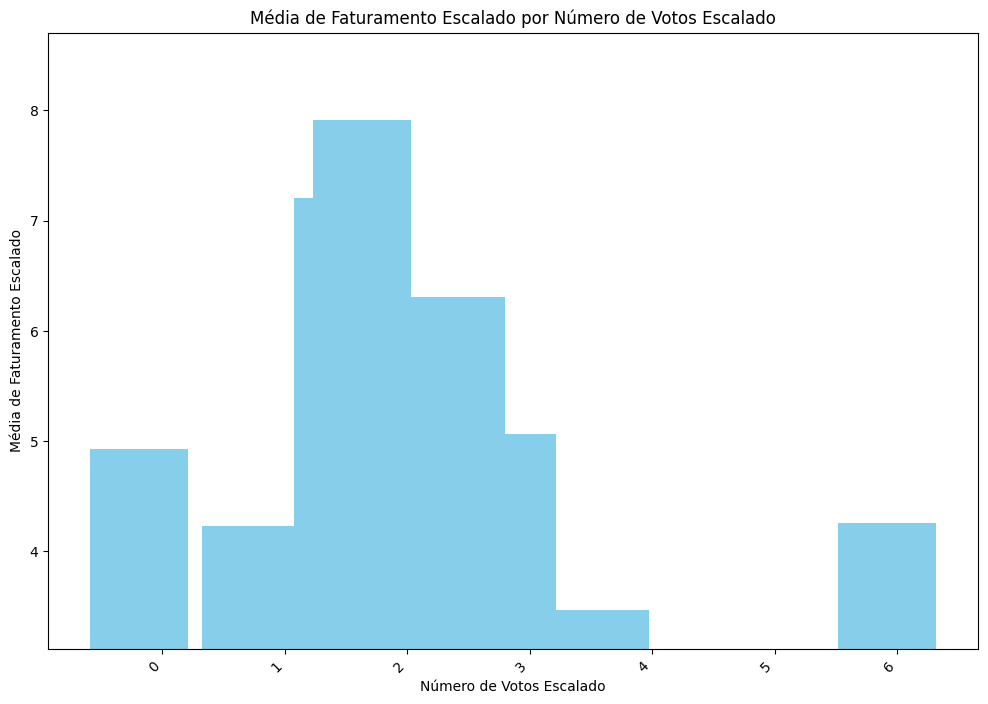

In [7]:
# Filtrar colunas relevantes e remover linhas com valores nulos em 'Gross' e 'No_of_Votes'
IMDB_filtered = IMDB[['Gross', 'No_of_Votes']].dropna()

# Escalar as colunas Gross e No_of_Votes
scaler = StandardScaler()
IMDB_filtered[['Gross', 'No_of_Votes']] = scaler.fit_transform(IMDB_filtered[['Gross', 'No_of_Votes']])

# Calcular a média do faturamento escalado por número de votos escalado
votes_gross = IMDB_filtered.groupby('No_of_Votes')['Gross'].mean().sort_values(ascending=False)

# Selecionar os 10 principais grupos de número de votos
top_votes = votes_gross.head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_votes.index, top_votes.values, color='skyblue')
plt.title('Média de Faturamento Escalado por Número de Votos Escalado')
plt.xlabel('Número de Votos Escalado')
plt.ylabel('Média de Faturamento Escalado')
plt.xticks(rotation=45, ha='right')

# Ajustar a escala do eixo Y para dar ênfase às pequenas diferenças
plt.ylim(min(top_votes.values) - 0.1 * min(top_votes.values), max(top_votes.values) + 0.1 * max(top_votes.values))

plt.show()

*Grafico de Barras: Media IMDB.*

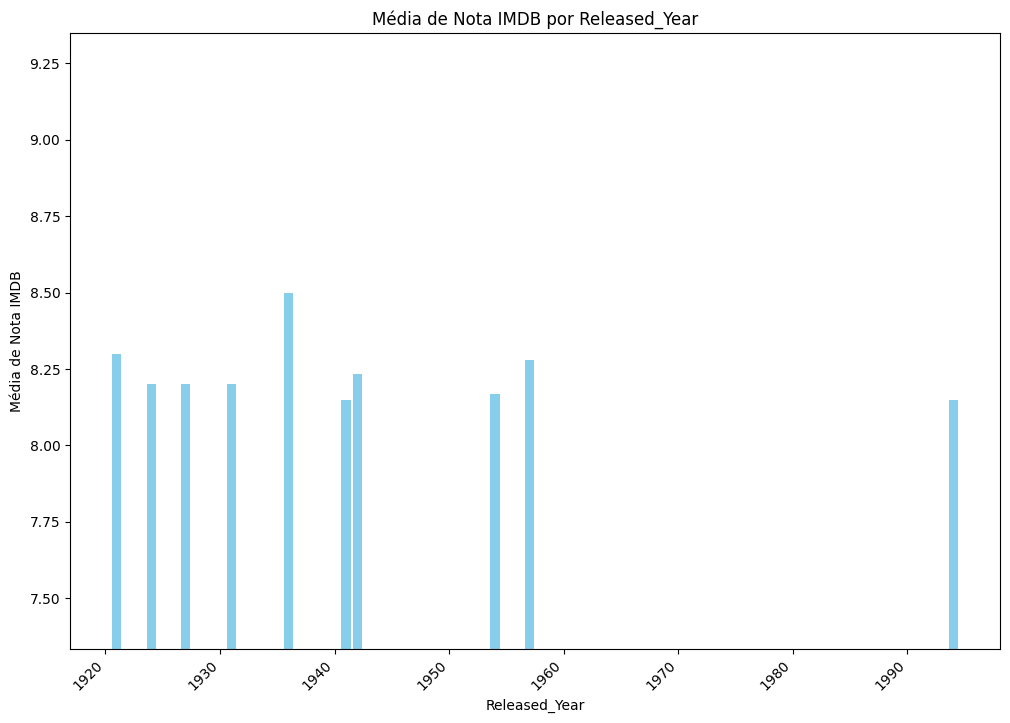

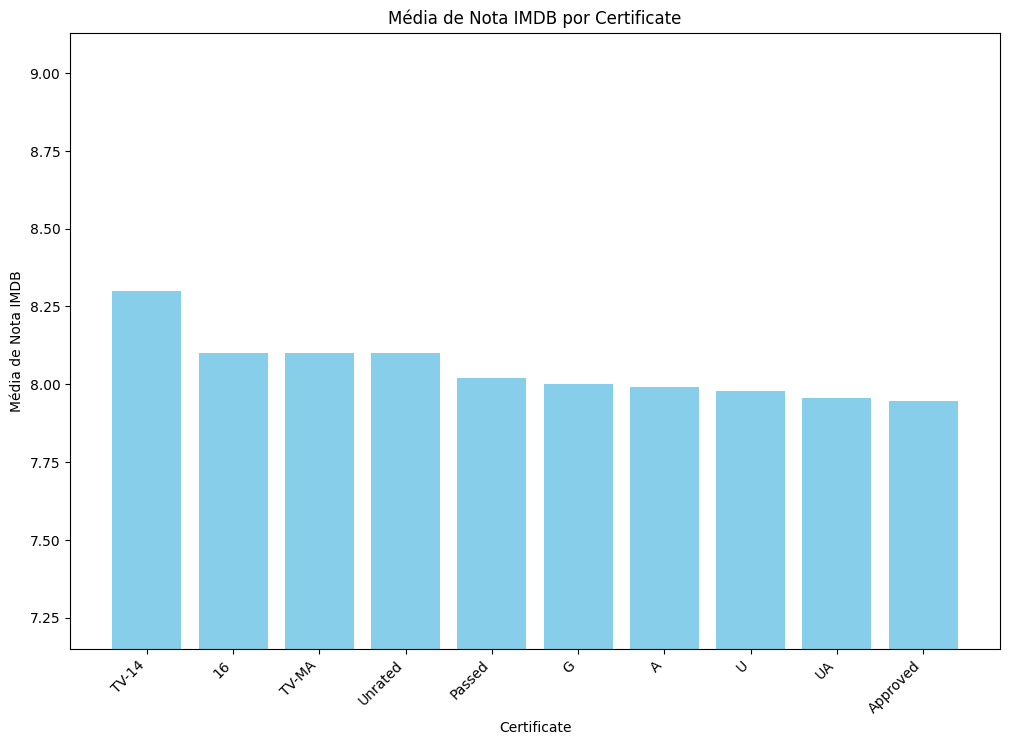

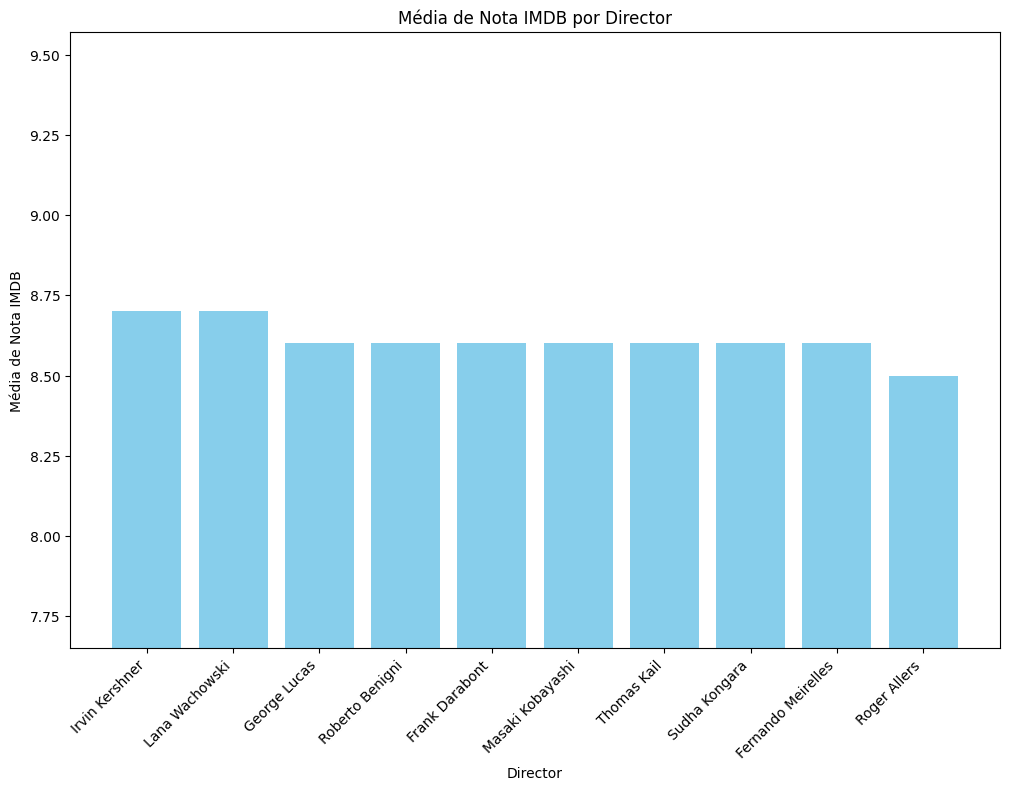

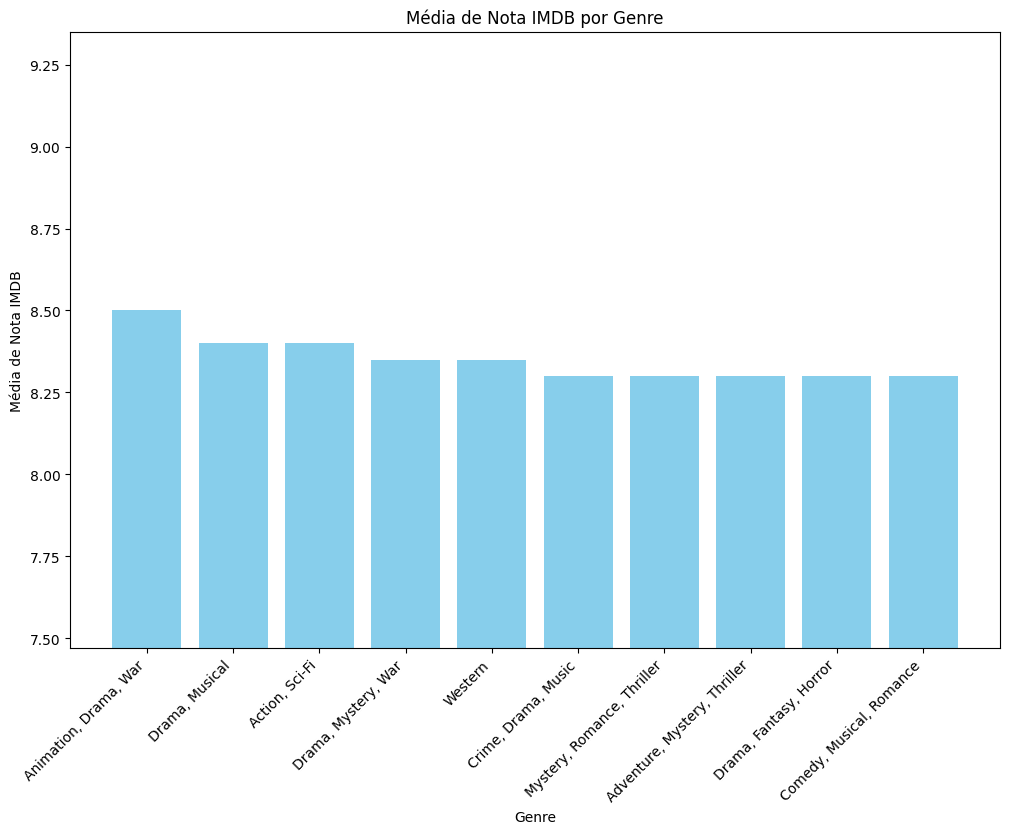

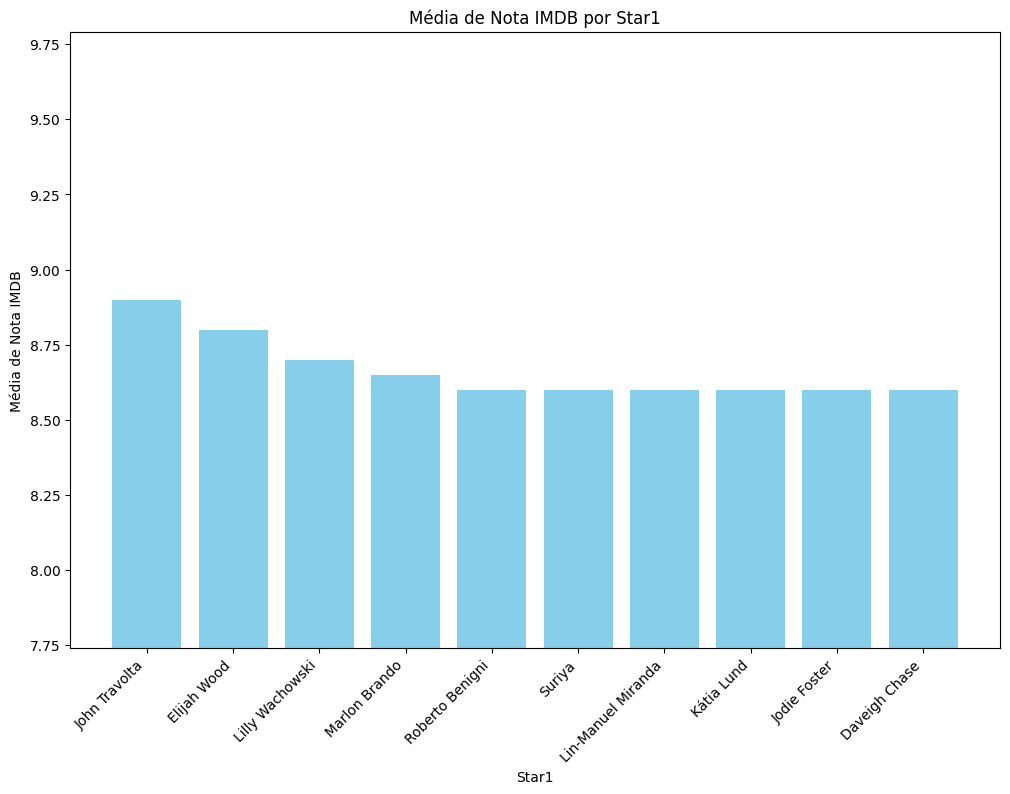

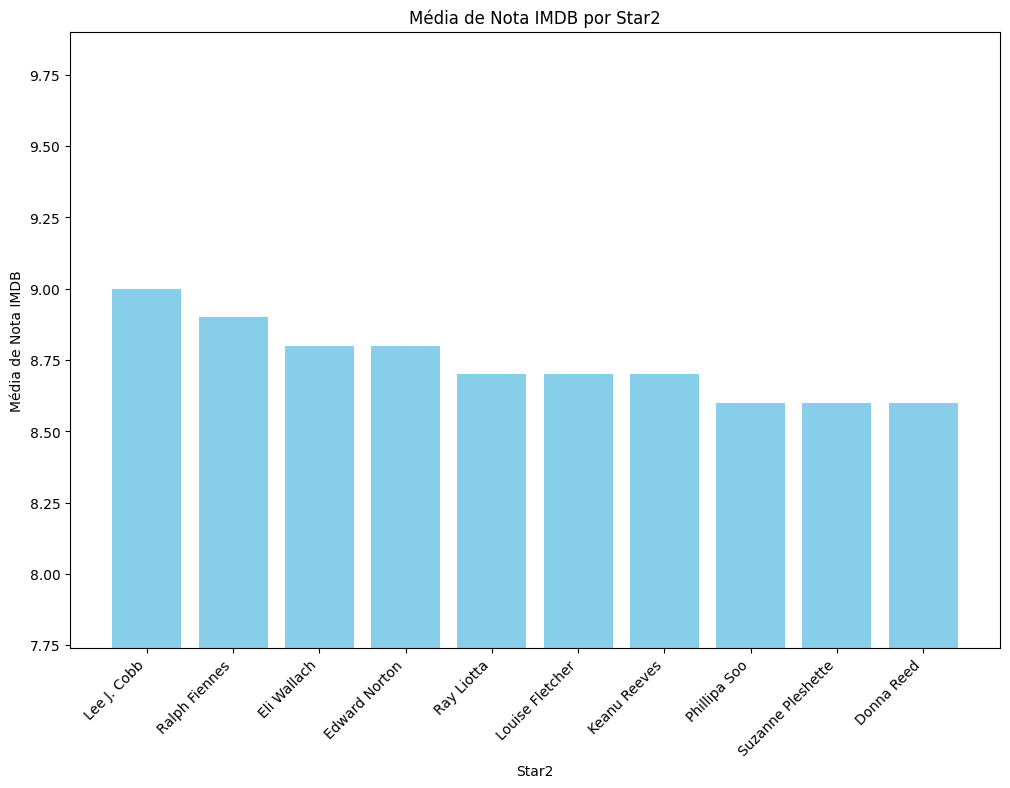

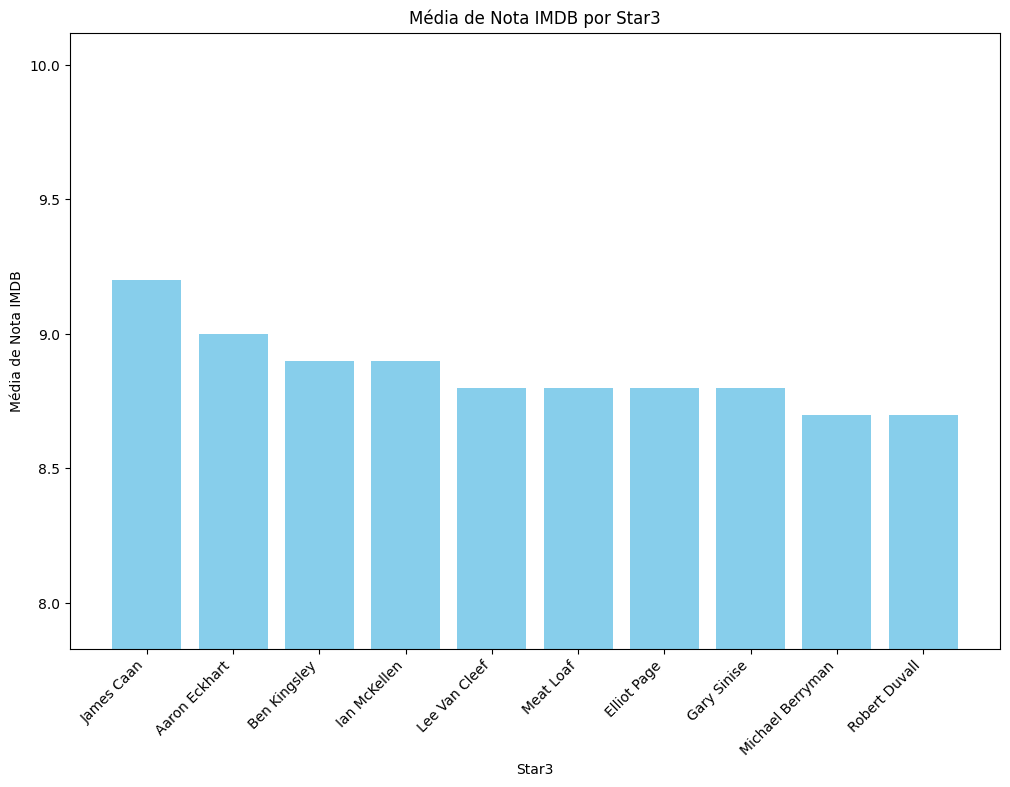

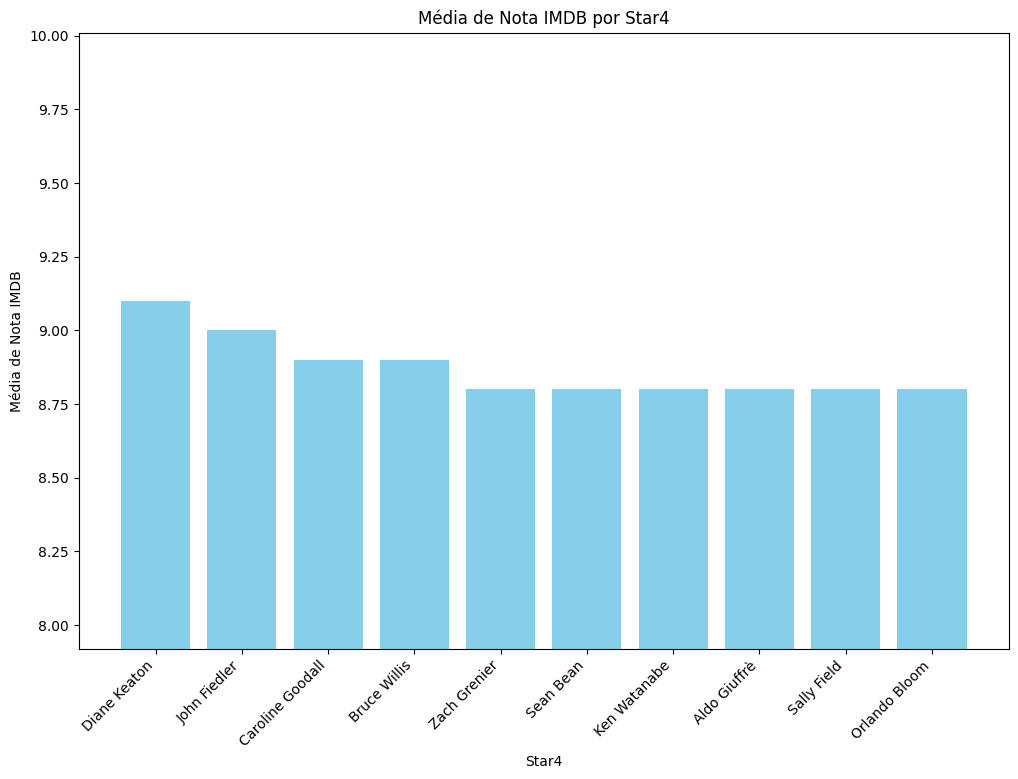

In [8]:
# Função para plotar o gráfico de barras baseado na média da Nota IMDB por categoria
def plot_mean_imdb_rating_by_category(category, top_n=10):
    mean_imdb_rating = IMDB.groupby(category)['IMDB_Rating'].mean().sort_values(ascending=False)
    top_categories = mean_imdb_rating.head(top_n)

    plt.figure(figsize=(12, 8))
    plt.bar(top_categories.index, top_categories.values, color='skyblue')
    plt.title(f'Média de Nota IMDB por {category}')
    plt.xlabel(category)
    plt.ylabel('Média de Nota IMDB')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(min(top_categories.values) - 0.1 * min(top_categories.values),
             max(top_categories.values) + 0.1 * max(top_categories.values))
    plt.show()

# Aplicar para diferentes categorias
categories = ['Released_Year', 'Certificate', 'Director', 'Genre',
              'Star1', 'Star2', 'Star3', 'Star4']

for category in categories:
    plot_mean_imdb_rating_by_category(category, top_n=10)

*Scatter Plot: Faturamento*

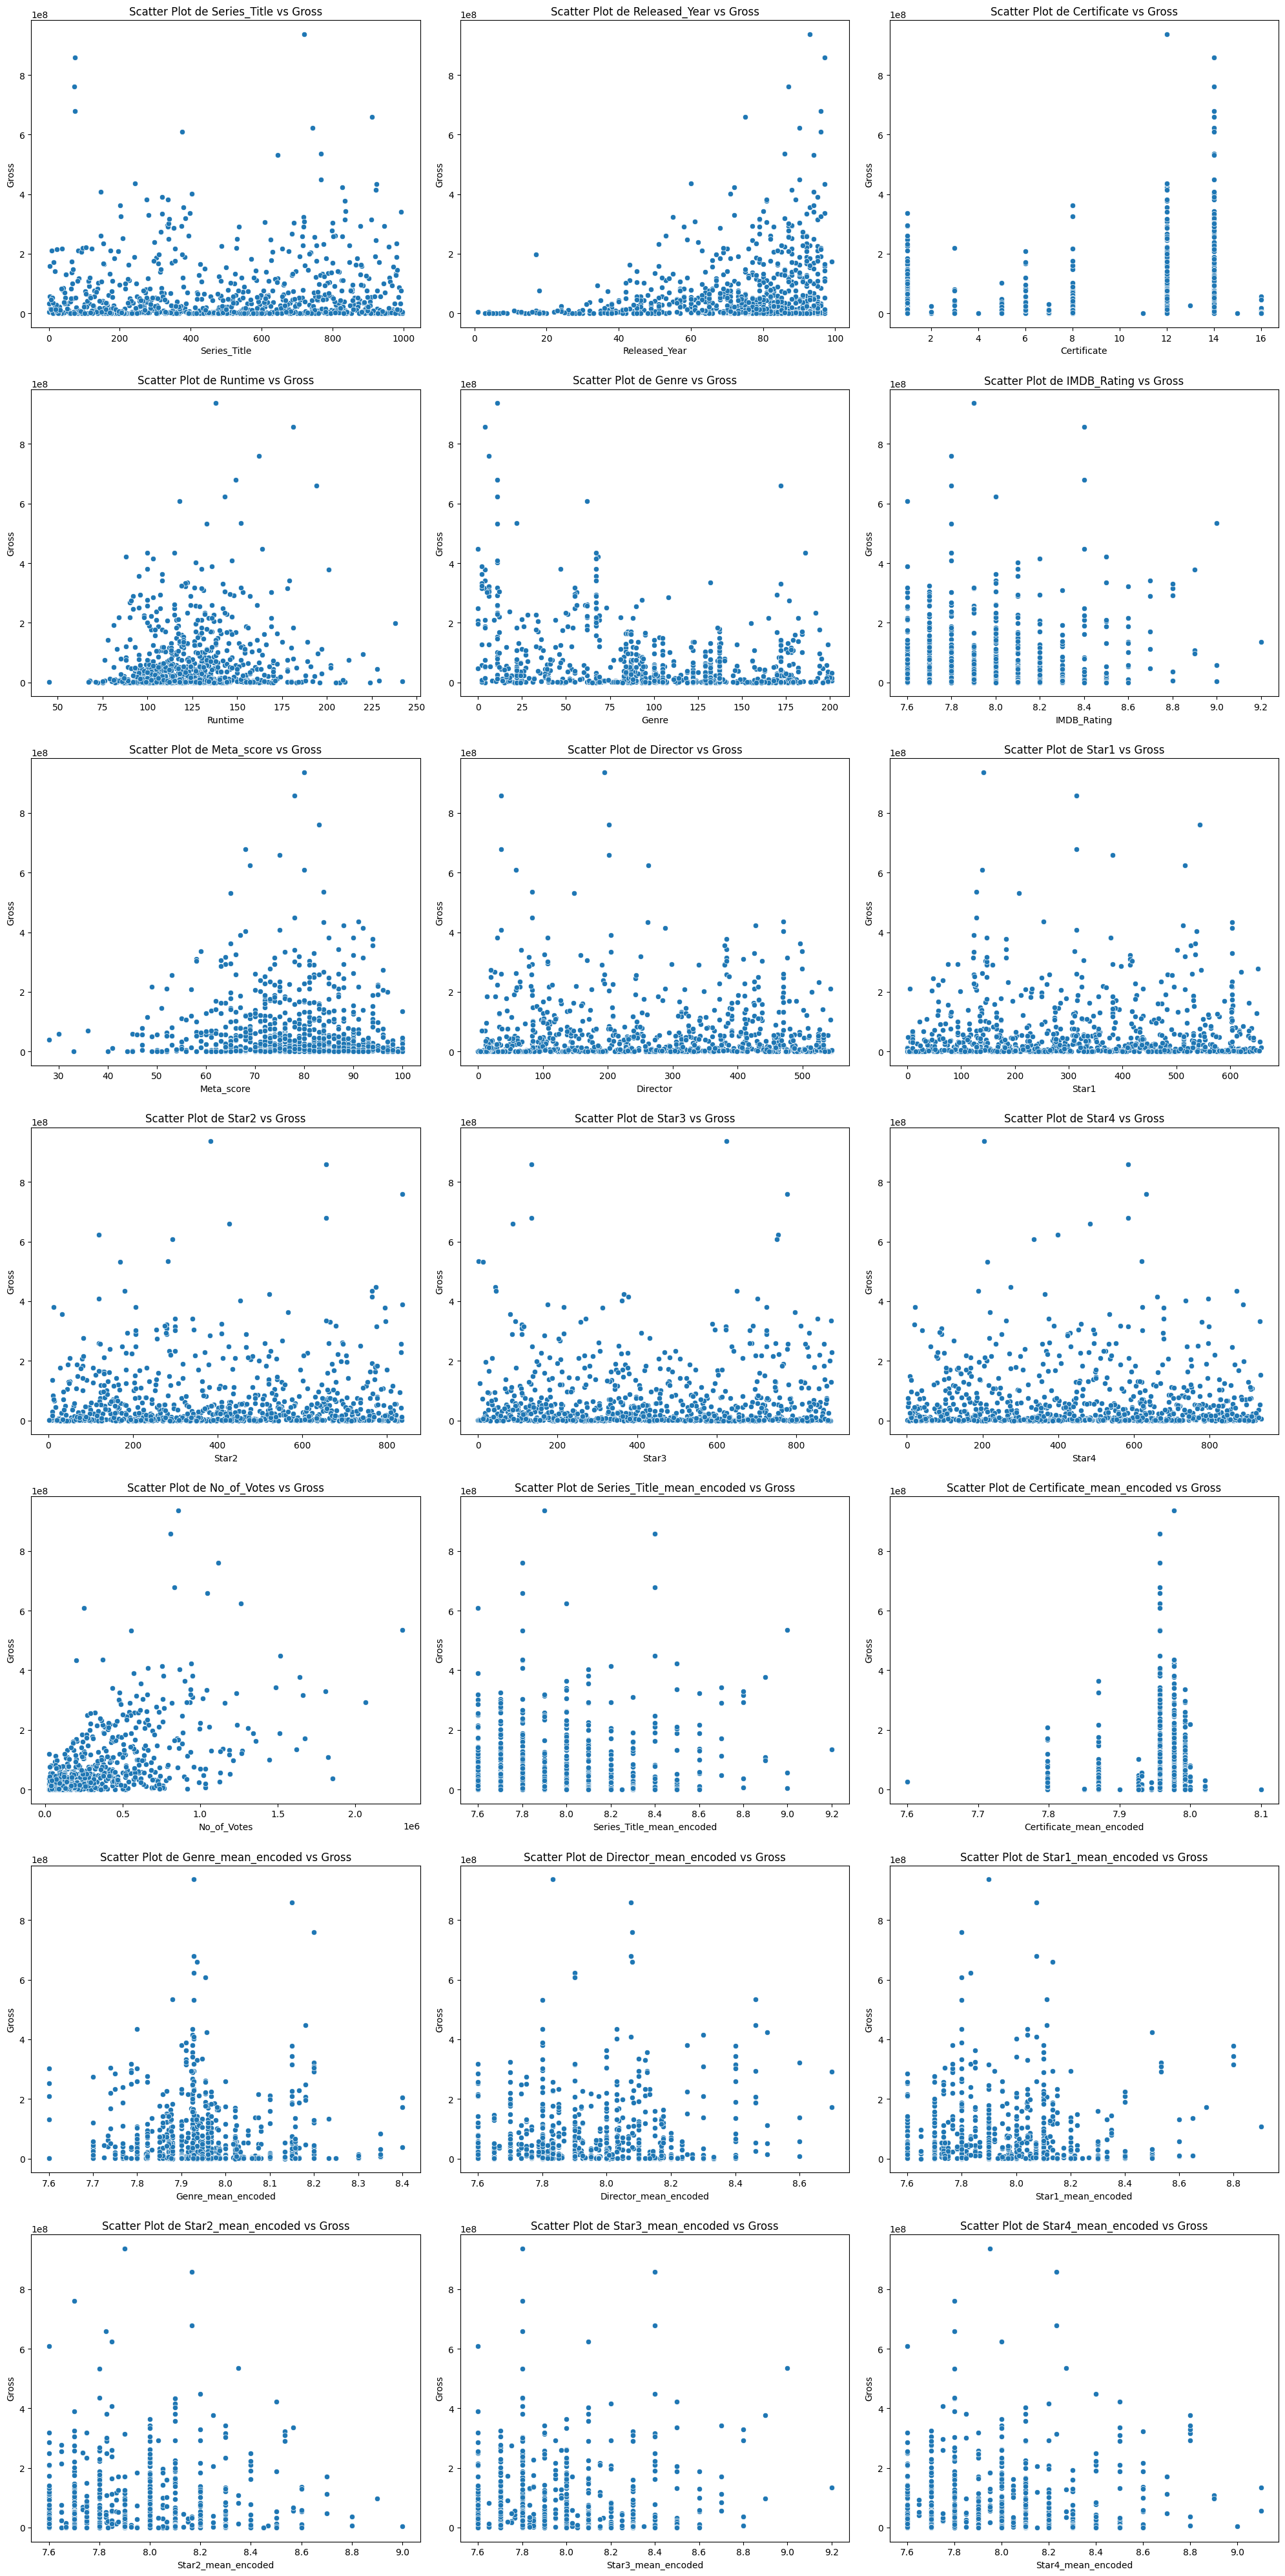

In [9]:
# Lista de variáveis para plotar contra Gross
variables = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
             'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
             'Star4', 'No_of_Votes', 'Series_Title_mean_encoded', 'Certificate_mean_encoded',
             'Genre_mean_encoded', 'Director_mean_encoded', 'Star1_mean_encoded',
             'Star2_mean_encoded', 'Star3_mean_encoded', 'Star4_mean_encoded']

# Criar scatter plots para cada variável em relação a Gross
plt.figure(figsize=(20, 40))

for i, variable in enumerate(variables):
    plt.subplot(7, 3, i+1)
    sns.scatterplot(x=IMDB_transformado[variable], y=IMDB_transformado['Gross'])
    plt.title(f'Scatter Plot de {variable} vs Gross')
    plt.xlabel(variable)
    plt.ylabel('Gross')

plt.tight_layout()
plt.show()

*Scater Plot: Rating_IMDB*

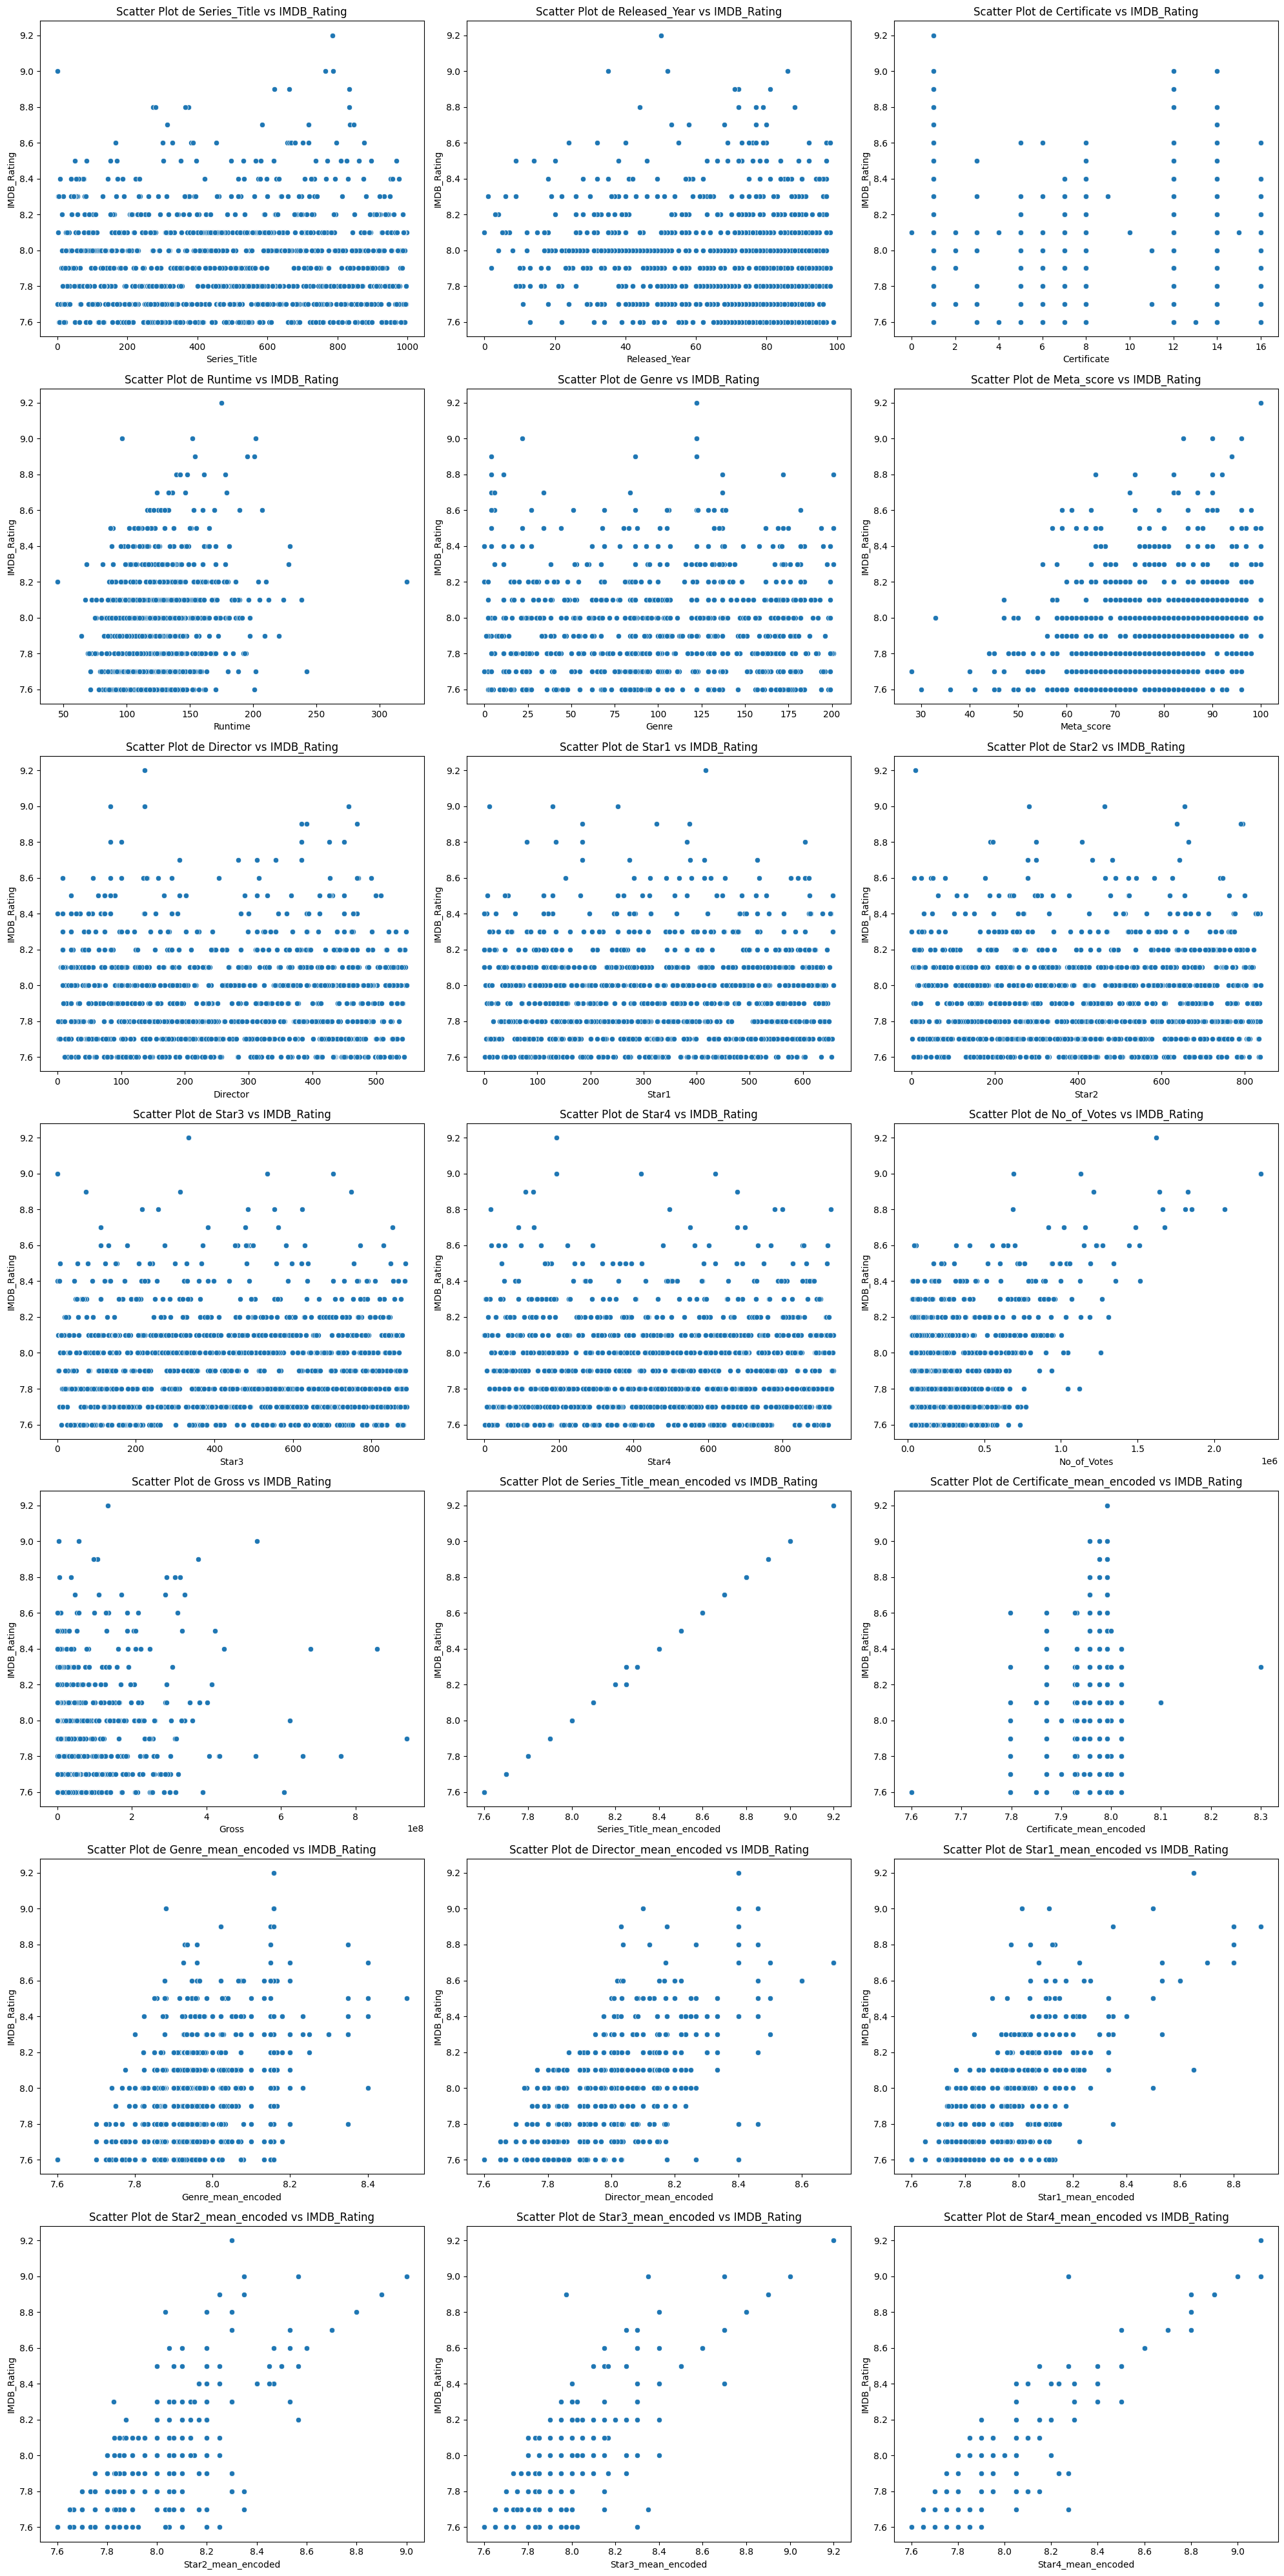

In [10]:
# Lista de variáveis para plotar contra IMDB_Rating
variables = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
             'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
             'Star4', 'No_of_Votes', 'Gross', 'Series_Title_mean_encoded',
             'Certificate_mean_encoded', 'Genre_mean_encoded', 'Director_mean_encoded',
             'Star1_mean_encoded', 'Star2_mean_encoded', 'Star3_mean_encoded', 'Star4_mean_encoded']

# Criar scatter plots para cada variável em relação a IMDB_Rating
plt.figure(figsize=(20, 40))

for i, variable in enumerate(variables):
    plt.subplot(7, 3, i+1)
    sns.scatterplot(x=IMDB_transformado[variable], y=IMDB_transformado['IMDB_Rating'])
    plt.title(f'Scatter Plot de {variable} vs IMDB_Rating')
    plt.xlabel(variable)
    plt.ylabel('IMDB_Rating')

plt.tight_layout()
plt.show()

**Etapa 4: Correlações**

A analise  Grafica denota que a Linearidade não pode ser garatida em todas as dimensões, demandando dessa forma o uso de uma correlção de Pearson para buscando por valores proximos de 1 ou -1. O dataset apresenta baixa Normalidade a primeira vista, para testar tal hipotese pode ser realizado o teste Shapiro- Wilk. Por fin serão plotados um heatmap das correlações entre todas as dimensões e graficos de barra para focalizando Gross e IMDB_rating e suas relações com as demais categorias.

                           Series_Title  Released_Year  Certificate   Runtime  \
Series_Title                   1.000000      -0.067693     0.003791 -0.051545   
Released_Year                 -0.067693       1.000000     0.059916  0.165848   
Certificate                    0.003791       0.059916     1.000000 -0.046699   
Runtime                       -0.051545       0.165848    -0.046699  1.000000   
Genre                         -0.039380      -0.178426    -0.080008 -0.062753   
IMDB_Rating                    0.022331      -0.134523    -0.020284  0.242751   
Meta_score                     0.006498      -0.339009    -0.008051 -0.031604   
Director                      -0.043155       0.098665     0.028351 -0.016253   
Star1                          0.029706       0.014057     0.052569  0.000811   
Star2                         -0.002250       0.055834    -0.011821  0.056260   
Star3                         -0.019106       0.000436     0.025855 -0.010555   
Star4                       

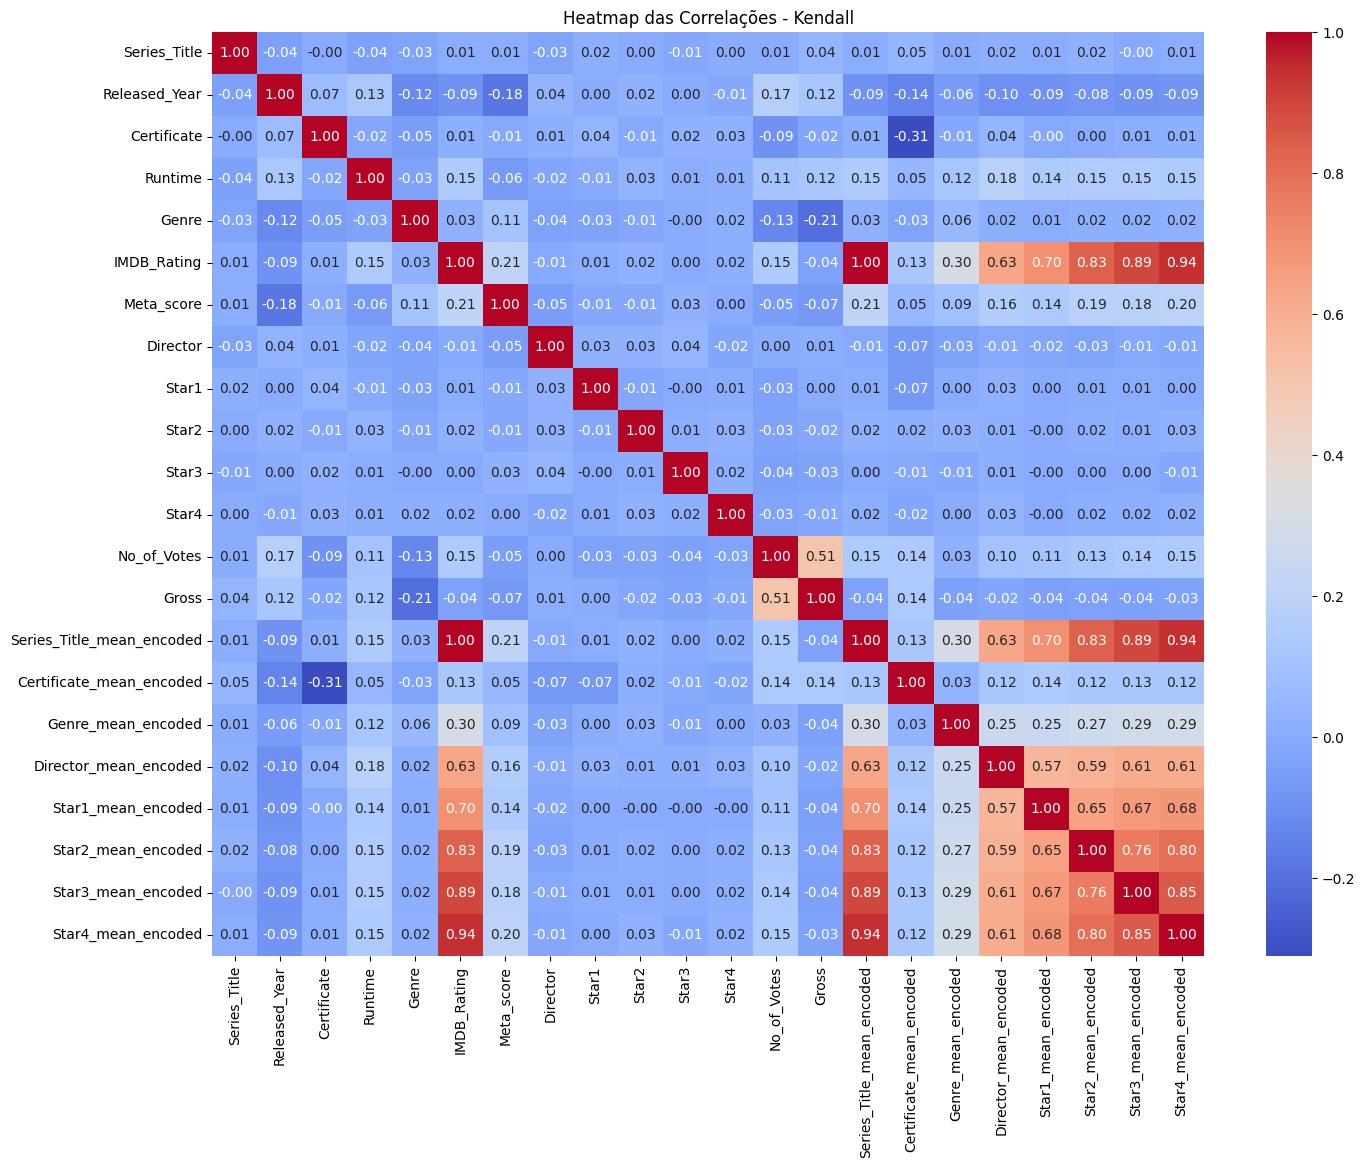

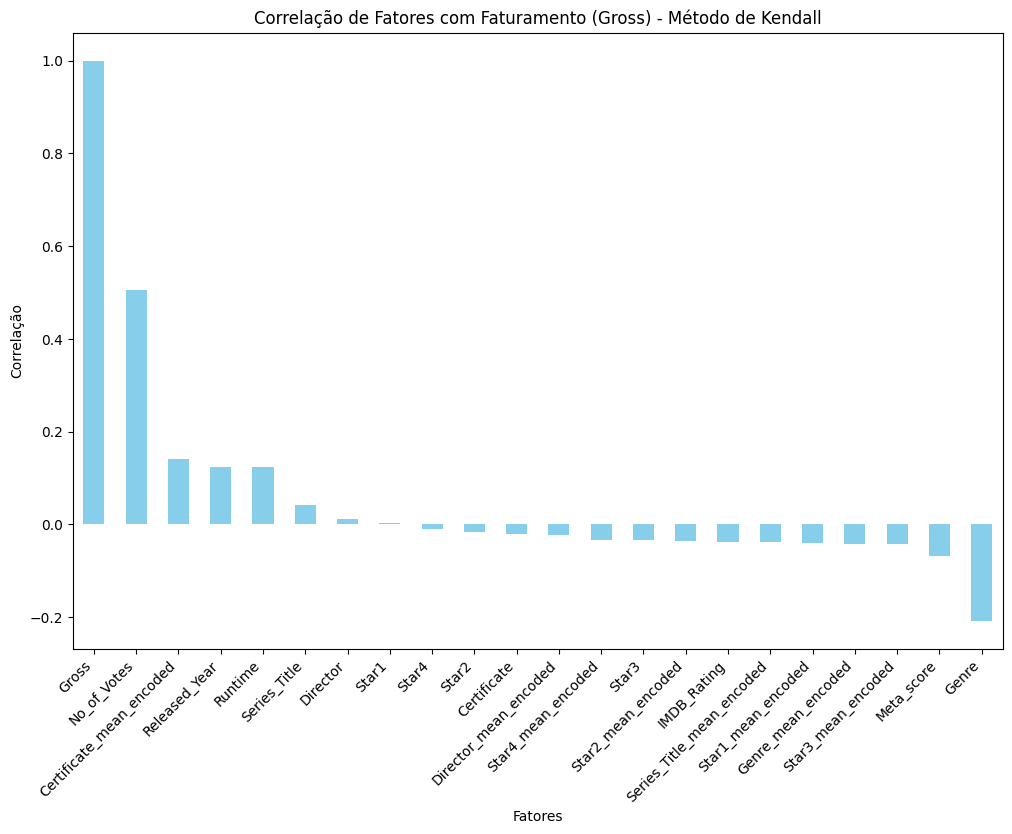

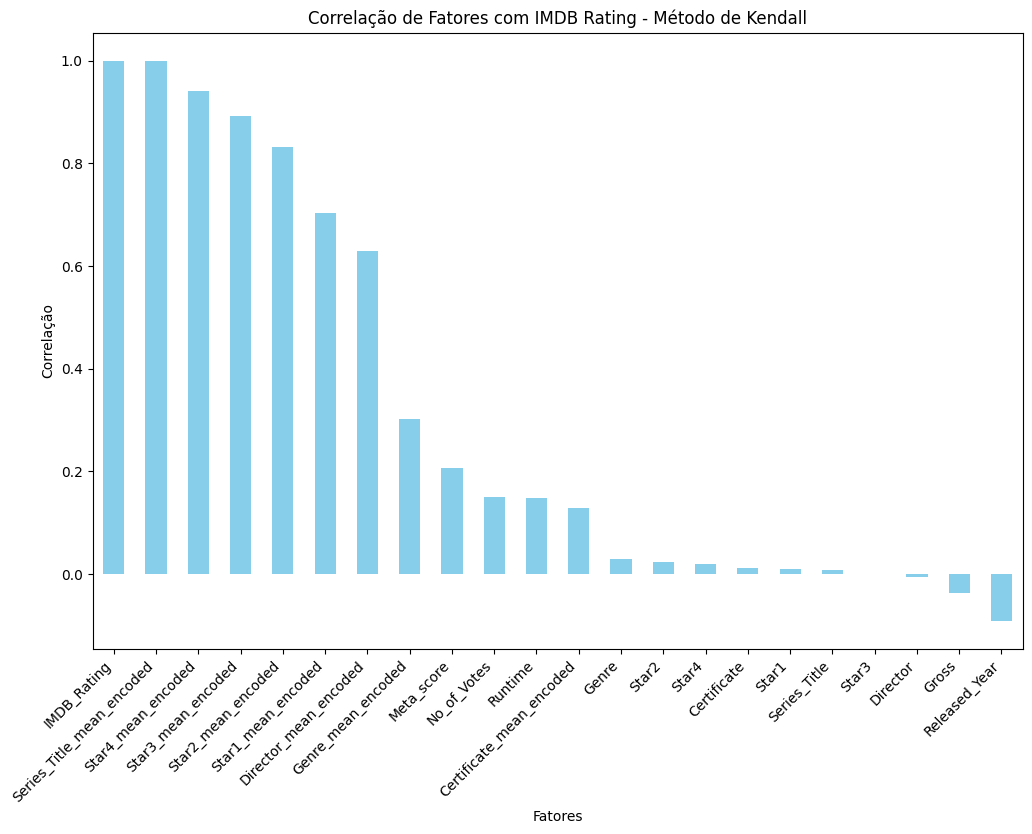

In [11]:
# Matriz de correlação usando Pearson
correlation_matrix = IMDB_transformado.corr(method='pearson')
print(correlation_matrix)

# Teste de Shapiro-Wilk
variables = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
             'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
             'Star4', 'No_of_Votes', 'Gross', 'Series_Title_mean_encoded',
             'Certificate_mean_encoded', 'Genre_mean_encoded', 'Director_mean_encoded',
             'Star1_mean_encoded', 'Star2_mean_encoded', 'Star3_mean_encoded', 'Star4_mean_encoded']

print("Teste de Shapiro-Wilk para normalidade:")
for variable in variables:
    data = IMDB_transformado[variable].dropna()
    stat, p = shapiro(data)
    print(f'{variable}: W={stat:.3f}, p={p:.3f}')
    if p < 0.05:
        print(f'{variable} não segue uma distribuição normal (reject H0)')
    else:
        print(f'{variable} segue uma distribuição normal (fail to reject H0)')

# Matriz de correlação usando Kendall
corr_kendall = IMDB_transformado.corr(method='kendall')

# Heatmap com a correlação de Kendall
plt.figure(figsize=(16, 12))
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap das Correlações - Kendall')
plt.show()

# Correlação de fatores com Gross
correlations_gross = IMDB_transformado.corr(method='kendall')['Gross']
plt.figure(figsize=(12, 8))
correlations_gross.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlação de Fatores com Faturamento (Gross) - Método de Kendall')
plt.xlabel('Fatores')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlação de fatores com IMDB_Rating
correlations_rating = IMDB_transformado.corr(method='kendall')['IMDB_Rating']
plt.figure(figsize=(12, 8))
correlations_rating.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlação de Fatores com IMDB Rating - Método de Kendall')
plt.xlabel('Fatores')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.show()


**Conclusão **
A analise dos dados permite deprender uma alta quantidade de registors nulos em proporção ao dataset como um todo, justificando os tratamentos realizados. As analises graficas e testes realizados apontam que nem todas as dimensões possume linearidade, o que implica que para construção de um modelo de ML novas transformações serão nescessarias visando reduzir o ruido.  

È possivel formular, dentre outras, as seguintes hipoteses:

1- A escalção de um bom  elenco contribui de forma mais contundente para um alto faturamento ou para uma alta nota no IMDB?

H0: Um bom elenco é mais contundente na obtenção de um alto faturamento.

H1: Um bom elenco é mais contundente na obtenção de uma alta Nota.

2-As altas taxas de corelação entre as categorias Star_x e Director poderiam indicar uma tendencia de grupos de atores e/ou diretores  trabalharem juntos multiplas vezes?

H0:Não existe a tendencia de  atores e/ou diretores  trabalharem juntos multiplas vezes.

H1: Existe a tendencia de  atores e/ou diretores  trabalharem juntos multiplas vezes.


3- Numero de votos tem uma correlção comparativamente alta, frente algumas outras dimensões, com a nota do IMDB! Poderia Numero de votos explicar uma alta variancia na nota IMDB?

H0: O numero de votos não explica uma alta variancia na nota IMDB.

H1: O numero de votos explica uma alta variancia na nota IMDB.


# Desafio 2

Responda:

1) Qual filme você recomendaria para uma pessoa que você não conhece?

2) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

3) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?


 **Questão 1**

Em função da falta de informações sobre sobre os gostos do desconhecido optaria por recomendações lastreadas na nota IMDB. Sobretudo uma lista com top 20.

In [12]:
# Suponha que 'IMDB_transformado' seja o DataFrame que contém os dados

# Ordenar o DataFrame pela coluna 'IMDB_Rating' de forma decrescente
top_20_movies = IMDB.sort_values(by='IMDB_Rating', ascending=False).head(20)

# Exibir os top 20 filmes
print(top_20_movies[['Series_Title', 'IMDB_Rating']])

                                         Series_Title  IMDB_Rating
0                                       The Godfather          9.2
2                              The Godfather: Part II          9.0
3                                        12 Angry Men          9.0
1                                     The Dark Knight          9.0
4       The Lord of the Rings: The Return of the King          8.9
5                                        Pulp Fiction          8.9
6                                    Schindler's List          8.9
7                                           Inception          8.8
8                                          Fight Club          8.8
9   The Lord of the Rings: The Fellowship of the Ring          8.8
10                                       Forrest Gump          8.8
11                    Il buono, il brutto, il cattivo          8.8
15     Star Wars: Episode V - The Empire Strikes Back          8.7
16                    One Flew Over the Cuckoo's Nest         


***Questão 2***

Uma das formas possiveis de inferir os fatores relacionados com a alta expectativa de faturamento é através da Análise de Componentes Principais (PCA).

Ela  pode ser usada para reduzir a dimensionalidade e identificar as variáveis mais importantes:



In [13]:
# Definir as features e padronizar os dados
features = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
             'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
             'Star4', 'No_of_Votes', 'Series_Title_mean_encoded', 'Certificate_mean_encoded',
             'Genre_mean_encoded', 'Director_mean_encoded', 'Star1_mean_encoded',
             'Star2_mean_encoded', 'Star3_mean_encoded', 'Star4_mean_encoded', 'Gross']

x = IMDB_transformado[features].fillna(0)
x = StandardScaler().fit_transform(x)

# Aplicar PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Variância explicada acumulada
cumulative_variance = np.cumsum(explained_variance)

# Número de componentes que explicam uma porcentagem específica da variância em Gross
gross_index = features.index('Gross')
threshold_variance = 0.65
num_components_gross = np.argmax(np.cumsum(pca.explained_variance_ratio_[gross_index:]) >= threshold_variance) + 1

print(f"Número de componentes que explicam pelo menos {threshold_variance*100:.0f}% da variância em Gross: {num_components_gross}")

# Redefinir PCA com o número de componentes desejado
pca_final = PCA(n_components=num_components_gross)
principalComponents_final = pca_final.fit_transform(x)

# Componentes principais e correlação com as features originais
component_names = features
principal_components = pca_final.components_

# Componente que mais influencia a variação de Gross
gross_component_index = np.argmax(np.abs(principal_components[:, gross_index]))

# Informações sobre o componente que mais influencia Gross
gross_component = principal_components[gross_component_index]
explained_variance_component = explained_variance[gross_component_index] * 100

print(f"O componente principal que mais influencia Gross explica {explained_variance_component:.2f}% da variância e é composto por:")
top_features = sorted(zip(gross_component, component_names), key=lambda x: abs(x[0]), reverse=True)[:3]
for weight, feature in top_features:
    print(f"{feature}: {weight:.2f}")

Número de componentes que explicam pelo menos 65% da variância em Gross: 1
O componente principal que mais influencia Gross explica 30.45% da variância e é composto por:
IMDB_Rating: 0.38
Series_Title_mean_encoded: 0.38
Star4_mean_encoded: 0.37


*Observação:*
A analise da PCA curiosamente se relaciona uma das hipoteses levantadas no desafio anterior,na qual indaga se o numero de votos explica uma alta variancia na nota IMDB, sendo:

H0: O numero de votos não explica uma alta variancia na nota IMDB.

H1: O numero de votos explica uma alta variancia na nota IMDB.

A PCA implica que HO deve ser aceita.

***Questão 3***

A coluna Overview consiste na sinopse do filme,uma inteligencia humana pode tranquilamente triar insights acerca de genero do filme, tom da narrativa e mesmo fazer suposições inferenciais acerca do enredo. No entenato para esta tarefa é mais complexa ao se tratar de computadores, tais insights podem ser obtidos mediante aplicações de modelos e tecnicas de PLN.

# Desafio 3
Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


Para a tarefa em questão um modelo de regresão é o mais indicado, uma vez que o objetivo é prever um valor numerico. Alem das transformações realizadas em desafios anteriores é proveitosos maximizar a lineridade do dataset, para isso devemos manter as seguintes dimensões:

No_of_Votes


Gross

Runtime

Meta_score

Certificate_mean_encoded

Genre_mean_encoded

Director_mean_encoded

Star1_mean_encoded

Star2_mean_encoded

Star3_mean_encoded

Star4_mean_encoded

                     feature          VIF
0                No_of_Votes     4.878562
1                      Gross     2.451768
2                    Runtime    26.616301
3                 Meta_score    44.563320
4   Certificate_mean_encoded  4577.934802
5         Genre_mean_encoded  4621.869991
6      Director_mean_encoded  3655.788771
7         Star1_mean_encoded  3797.879589
8         Star2_mean_encoded  4567.356871
9         Star3_mean_encoded  5612.941245
10        Star4_mean_encoded  7115.130657


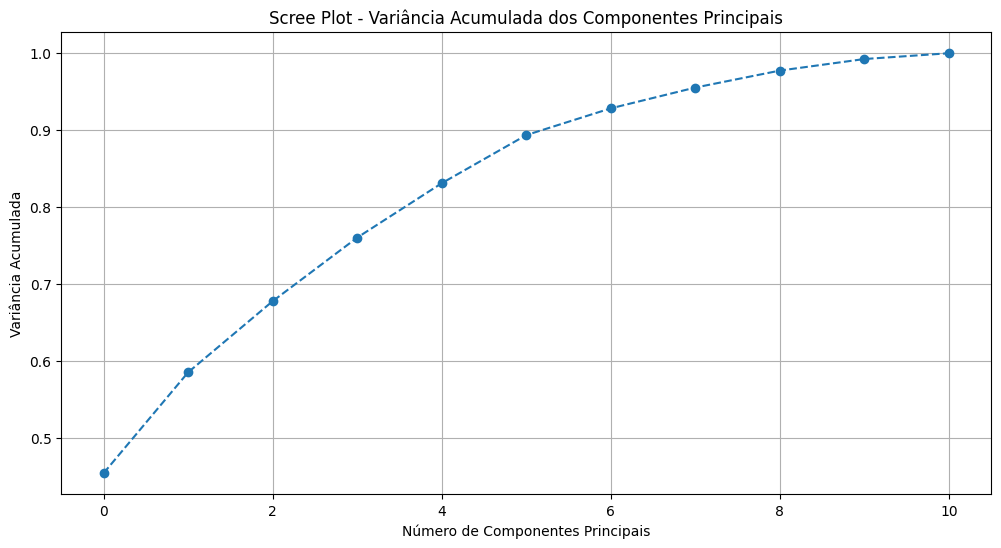

In [14]:
cols_for_regression = ['No_of_Votes', 'Gross', 'Runtime', 'Meta_score',
                       'Certificate_mean_encoded', 'Genre_mean_encoded',
                       'Director_mean_encoded', 'Star1_mean_encoded',
                       'Star2_mean_encoded', 'Star3_mean_encoded',
                       'Star4_mean_encoded', 'IMDB_Rating']

# DataFrame com as colunas especificadas
df_regressao = IMDB_transformado[cols_for_regression].copy()
df_regressao.dropna(inplace=True)

# DataFrame de features (sem target)
df_features = df_regressao.drop(columns=['IMDB_Rating'])

# Calcular VIF para cada variável independente
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

print(vif_data)

# Padronização dos dados
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

# Aplicar PCA
pca = PCA()
df_features_pca = pca.fit_transform(df_features_scaled)

# Variância explicada por componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Variância acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Gráfico de scree plot
plt.figure(figsize=(12, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot - Variância Acumulada dos Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada')
plt.grid(True)
plt.show()

# Selecionar número de componentes que explicam pelo menos 90% da variância
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Redefinir PCA com o número de componentes desejado
pca_90 = PCA(n_components=n_components_90)
df_features_pca_90 = pca_90.fit_transform(df_features_scaled)

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_features_pca_90, df_regressao['IMDB_Rating'], test_size=0.2, random_state=42)

# Regressão Linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [15]:
# Regressão com Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_test_rf = rf_regressor.predict(X_test)

# Métricas para Random Forest
print("Random Forest - Métricas:")
print("Treino - MSE:", mean_squared_error(y_train, y_pred_train_rf))
print("Treino - R²:", r2_score(y_train, y_pred_train_rf))
print("Treino - MAE:", mean_absolute_error(y_train, y_pred_train_rf))
print("Treino - MAPE:", mean_absolute_percentage_error(y_train, y_pred_train_rf))
print("Teste - MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("Teste - R²:", r2_score(y_test, y_pred_test_rf))
print("Teste - MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("Teste - MAPE:", mean_absolute_percentage_error(y_test, y_pred_test_rf))

Random Forest - Métricas:
Treino - MSE: 0.0007215075125209308
Treino - R²: 0.9910822202541004
Treino - MAE: 0.019310517529216874
Treino - MAPE: 0.0024200933917295693
Teste - MSE: 0.0052145200000002015
Teste - R²: 0.936146649686518
Teste - MAE: 0.05113333333333559
Teste - MAPE: 0.0063798755062664065


Em relação aos presupostos do modelo cabe destacar que o modelo Random Forest é avaliado principalmente através de suas métricas de desempenho preditivo uma vez que é um modelo não paramétrico que não depende dos pressupostos comuns a modelos lineares.



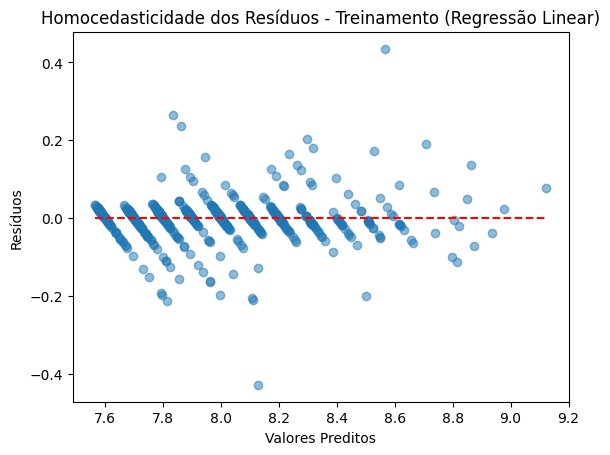

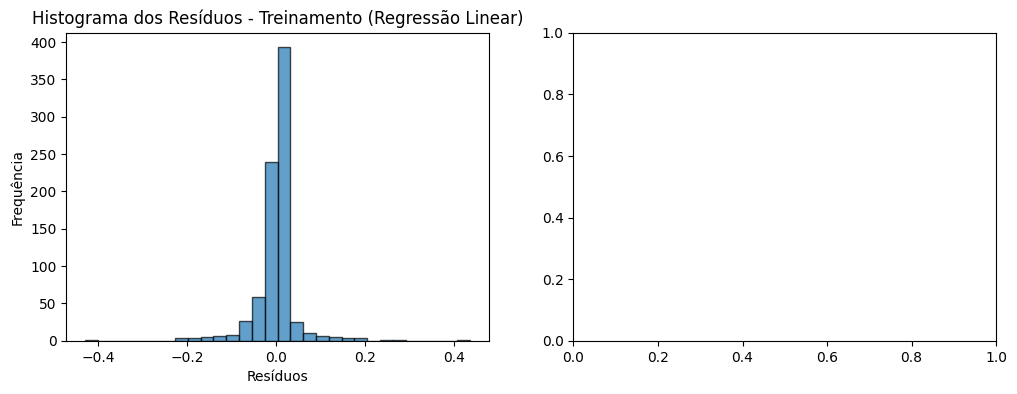

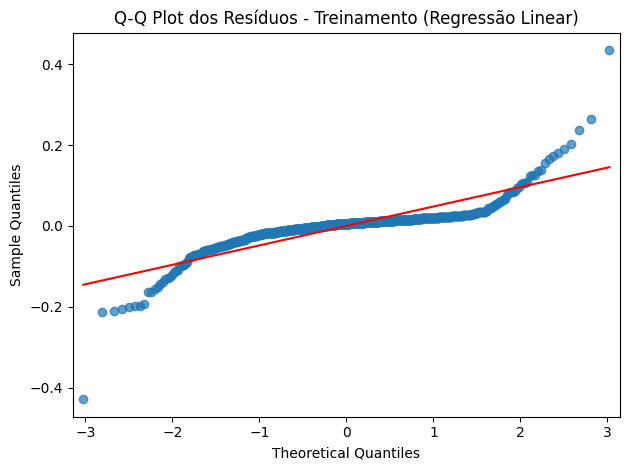

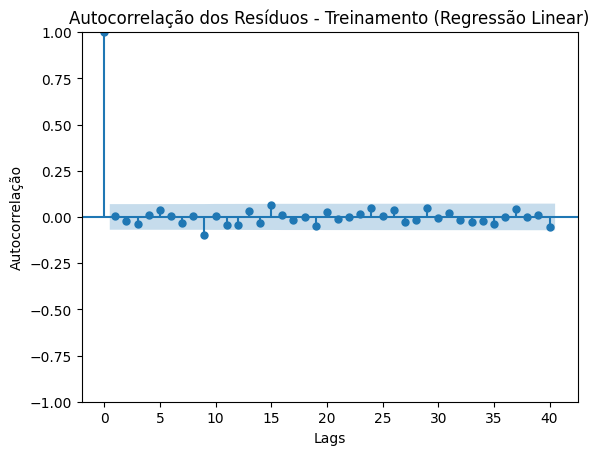

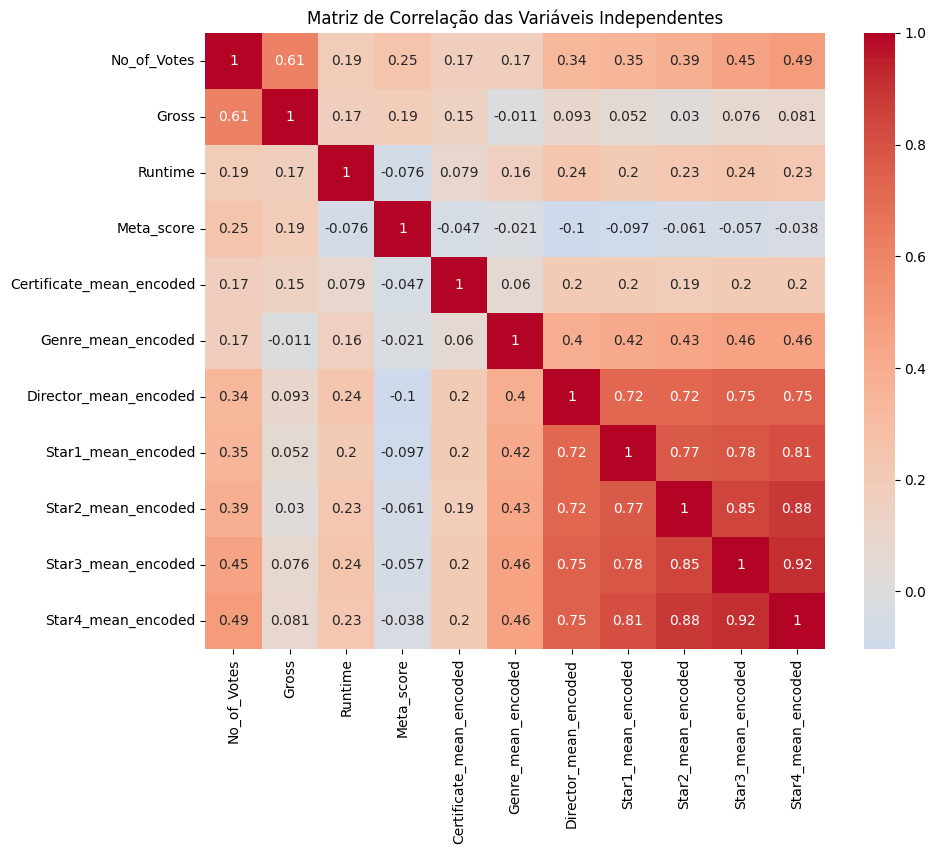

    feature       VIF
0         0  2.472992
1         1  1.830045
2         2  1.111457
3         3  1.141675
4         4  1.074946
5         5  1.303230
6         6  2.688518
7         7  3.355783
8         8  4.900068
9         9  6.972514
10       10  9.637004
O modelo de regressão linear foi aprovado em todos os pressupostos.
Regressão Linear - Métricas:
Treino - MSE: 0.0023102067045454823
Treino - R²: 0.9696484499587268
Treino - MAE: 0.025795977754363656
Treino - MAPE: 0.0032235679461054666
Teste - MSE: 0.0027143319824780698
Teste - R²: 0.9586507223435795
Teste - MAE: 0.02830125153051144
Teste - MAPE: 0.0035714337236471593


In [16]:
# Regressão Linear
# Carregar e preparar os dados (conforme já realizado anteriormente)
IMDB = pd.read_csv('/content/drive/MyDrive/Cópia de desafio_indicium_imdb.csv')
IMDB['Runtime'] = IMDB['Runtime'].str.extract('(\d+)').astype(float)
IMDB['Gross'] = IMDB['Gross'].str.replace(',', '').astype(float)
IMDB['Released_Year'] = pd.to_datetime(IMDB['Released_Year'], errors='coerce').dt.year
IMDB['Meta_score'].fillna(np.nan, inplace=True)
IMDB['Gross'].fillna(np.nan, inplace=True)
IMDB['Certificate'].fillna(np.nan, inplace=True)
IMDB.drop(columns=['Unnamed: 0', 'Overview'], inplace=True)

# Label Encoding para colunas categóricas
label_enc_columns = ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
label_encoders = {}
for col in label_enc_columns:
    le = LabelEncoder()
    IMDB[col] = le.fit_transform(IMDB[col].astype(str))
    label_encoders[col] = le

# Target Encoding (Mean Encoding) para colunas categóricas
target_enc_columns = ['Series_Title', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in target_enc_columns:
    mean_encoding = IMDB.groupby(col)['IMDB_Rating'].mean()
    IMDB[col + '_mean_encoded'] = IMDB[col].map(mean_encoding)

# Selecionar as features e o target
features = ['No_of_Votes', 'Gross', 'Runtime', 'Meta_score', 'Certificate_mean_encoded', 'Genre_mean_encoded',
            'Director_mean_encoded', 'Star1_mean_encoded', 'Star2_mean_encoded', 'Star3_mean_encoded', 'Star4_mean_encoded']
target = 'IMDB_Rating'

# Separar os dados em treino e teste
X = IMDB[features].fillna(0)
y = IMDB[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar o modelo de regressão linear
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_scaled, y_train)

# Prever os valores para os conjuntos de treino e teste
y_train_pred_linear = regressor_linear.predict(X_train_scaled)
y_test_pred_linear = regressor_linear.predict(X_test_scaled)

# Calcular os resíduos
residuos_train_linear = np.squeeze(np.array(y_train)) - y_train_pred_linear
residuos_test_linear = np.squeeze(np.array(y_test)) - y_test_pred_linear

# 1. Homocedasticidade dos Resíduos
plt.scatter(y_train_pred_linear.flatten(), residuos_train_linear, alpha=0.5)
plt.hlines(0, xmin=min(y_train_pred_linear.flatten()), xmax=max(y_train_pred_linear.flatten()), colors='r', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Homocedasticidade dos Resíduos - Treinamento (Regressão Linear)')
plt.show()

# 2. Normalidade dos Resíduos
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(residuos_train_linear, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos - Treinamento (Regressão Linear)')

plt.subplot(1, 2, 2)
sm.graphics.qqplot(residuos_train_linear, line='s', alpha=0.7)
plt.title('Q-Q Plot dos Resíduos - Treinamento (Regressão Linear)')

plt.tight_layout()
plt.show()

# 3. Autocorrelação dos Resíduos
sm.graphics.tsa.plot_acf(residuos_train_linear.flatten(), lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('Autocorrelação dos Resíduos - Treinamento (Regressão Linear)')
plt.show()

# 4. Multicolinearidade - Matriz de Correlação das Variáveis Independentes
X_train_df = pd.DataFrame(X_train_scaled, columns=features)

plt.figure(figsize=(10, 8))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis Independentes')
plt.show()

# Teste de Multicolinearidade usando VIF
vif_data_linear = pd.DataFrame()
vif_data_linear["feature"] = range(X_train_scaled.shape[1])
vif_data_linear["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data_linear)

# Verificando se algum VIF é maior que 10
if (vif_data_linear["VIF"] > 10).any():
    print("O modelo de regressão linear foi reprovado devido à presença de multicolinearidade.")
else:
    print("O modelo de regressão linear foi aprovado em todos os pressupostos.")

# Métricas para Regressão Linear
print("Regressão Linear - Métricas:")
print("Treino - MSE:", mean_squared_error(y_train, y_train_pred_linear))
print("Treino - R²:", r2_score(y_train, y_train_pred_linear))
print("Treino - MAE:", mean_absolute_error(y_train, y_train_pred_linear))
print("Treino - MAPE:", mean_absolute_percentage_error(y_train, y_train_pred_linear))
print("Teste - MSE:", mean_squared_error(y_test, y_test_pred_linear))
print("Teste - R²:", r2_score(y_test, y_test_pred_linear))
print("Teste - MAE:", mean_absolute_error(y_test, y_test_pred_linear))
print("Teste - MAPE:", mean_absolute_percentage_error(y_test, y_test_pred_linear))


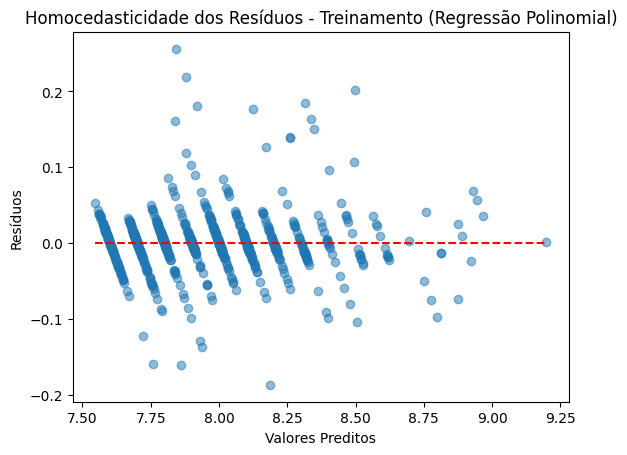

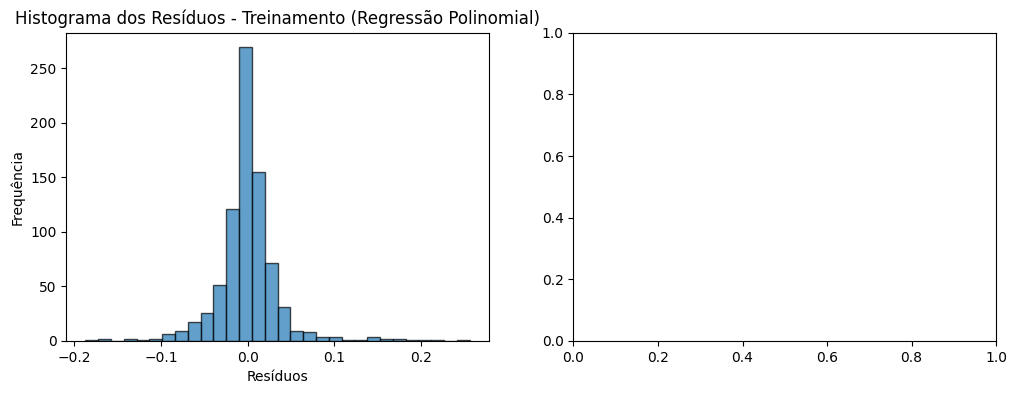

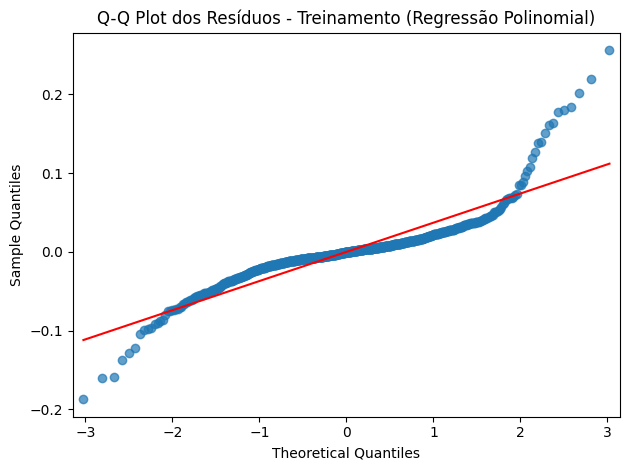

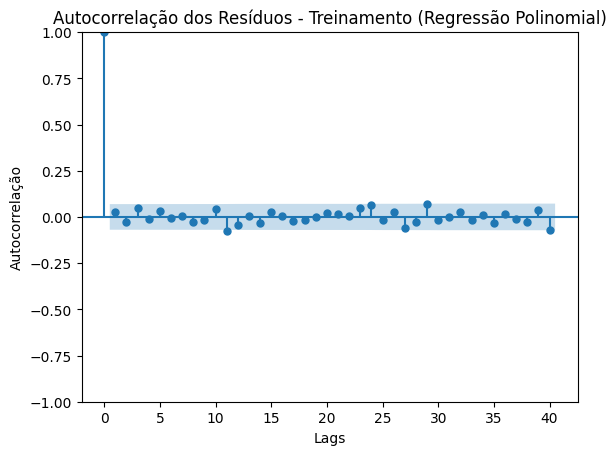

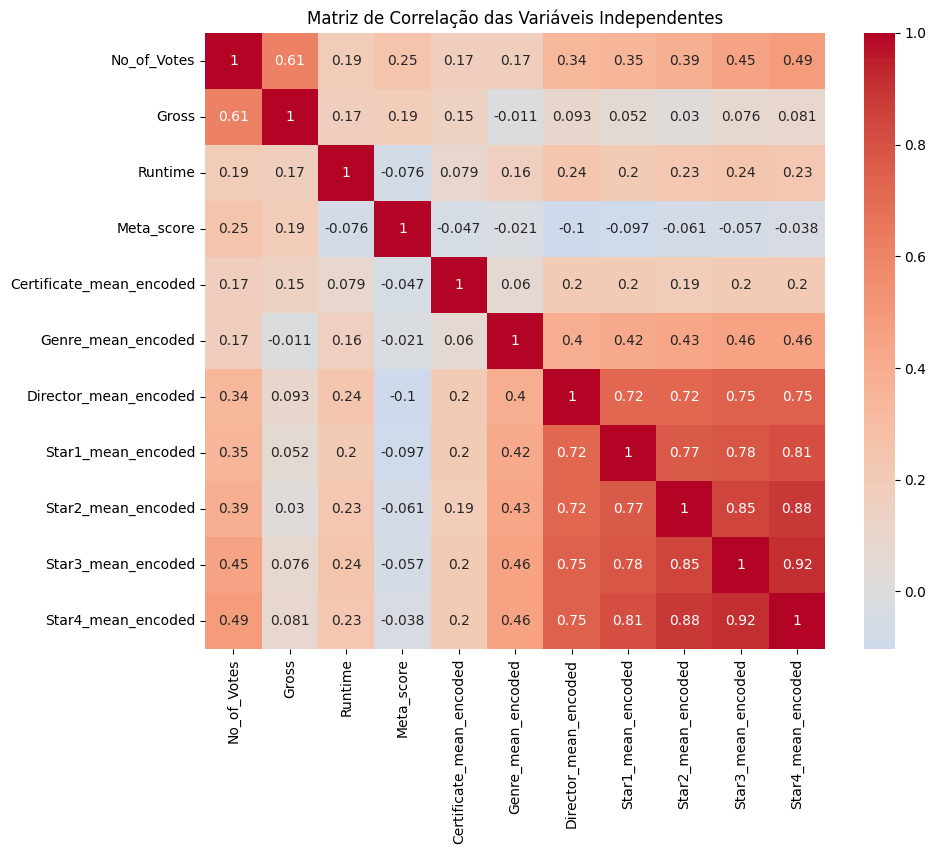

    feature         VIF
0         0    9.383665
1         1    9.352550
2         2    1.858248
3         3    4.565147
4         4    2.013069
..      ...         ...
72       72   68.818066
73       73  111.820300
74       74   50.783711
75       75  126.797854
76       76   81.593861

[77 rows x 2 columns]
O modelo de regressão polinomial foi reprovado devido à presença de multicolinearidade.
Regressão Polinomial - Métricas:
Treino - MSE: 0.0013732446936252645
Treino - R²: 0.9819582789040168
Treino - MAE: 0.022176997180320134
Treino - MAPE: 0.002773906035733097
Teste - MSE: 0.003006742279815194
Teste - R²: 0.9541962360639937
Teste - MAE: 0.027961523182087042
Teste - MAPE: 0.003491292058205513


In [17]:
# Carregar e preparar os dados (conforme já realizado anteriormente)
IMDB = pd.read_csv('/content/drive/MyDrive/Cópia de desafio_indicium_imdb.csv')
IMDB['Runtime'] = IMDB['Runtime'].str.extract('(\d+)').astype(float)
IMDB['Gross'] = IMDB['Gross'].str.replace(',', '').astype(float)
IMDB['Released_Year'] = pd.to_datetime(IMDB['Released_Year'], errors='coerce').dt.year
IMDB['Meta_score'].fillna(np.nan, inplace=True)
IMDB['Gross'].fillna(np.nan, inplace=True)
IMDB['Certificate'].fillna(np.nan, inplace=True)
IMDB.drop(columns=['Unnamed: 0', 'Overview'], inplace=True)

# Label Encoding para colunas categóricas
label_enc_columns = ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
label_encoders = {}
for col in label_enc_columns:
    le = LabelEncoder()
    IMDB[col] = le.fit_transform(IMDB[col].astype(str))
    label_encoders[col] = le

# Target Encoding (Mean Encoding) para colunas categóricas
target_enc_columns = ['Series_Title', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in target_enc_columns:
    mean_encoding = IMDB.groupby(col)['IMDB_Rating'].mean()
    IMDB[col + '_mean_encoded'] = IMDB[col].map(mean_encoding)

# Selecionar as features e o target
features = ['No_of_Votes', 'Gross', 'Runtime', 'Meta_score', 'Certificate_mean_encoded', 'Genre_mean_encoded',
            'Director_mean_encoded', 'Star1_mean_encoded', 'Star2_mean_encoded', 'Star3_mean_encoded', 'Star4_mean_encoded']
target = 'IMDB_Rating'

# Separar os dados em treino e teste
X = IMDB[features].fillna(0)
y = IMDB[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar a regressão polinomial
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ajustar o modelo de regressão polinomial
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

# Prever os valores para os conjuntos de treino e teste
y_train_pred_poly = regressor_poly.predict(X_train_poly)
y_test_pred_poly = regressor_poly.predict(X_test_poly)

# Calcular os resíduos
residuos_train_poly = np.squeeze(np.array(y_train)) - y_train_pred_poly
residuos_test_poly = np.squeeze(np.array(y_test)) - y_test_pred_poly

# 1. Homocedasticidade dos Resíduos
plt.scatter(y_train_pred_poly.flatten(), residuos_train_poly, alpha=0.5)
plt.hlines(0, xmin=min(y_train_pred_poly.flatten()), xmax=max(y_train_pred_poly.flatten()), colors='r', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Homocedasticidade dos Resíduos - Treinamento (Regressão Polinomial)')
plt.show()

# 2. Normalidade dos Resíduos
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(residuos_train_poly, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos - Treinamento (Regressão Polinomial)')

plt.subplot(1, 2, 2)
sm.graphics.qqplot(residuos_train_poly, line='s', alpha=0.7)
plt.title('Q-Q Plot dos Resíduos - Treinamento (Regressão Polinomial)')

plt.tight_layout()
plt.show()

# 3. Autocorrelação dos Resíduos
sm.graphics.tsa.plot_acf(residuos_train_poly.flatten(), lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('Autocorrelação dos Resíduos - Treinamento (Regressão Polinomial)')
plt.show()

# 4. Multicolinearidade - Matriz de Correlação das Variáveis Independentes
X_train_df = pd.DataFrame(X_train_scaled, columns=features)

plt.figure(figsize=(10, 8))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis Independentes')
plt.show()

# Teste de Multicolinearidade usando VIF
vif_data_poly = pd.DataFrame()
vif_data_poly["feature"] = range(X_train_poly.shape[1])
vif_data_poly["VIF"] = [variance_inflation_factor(X_train_poly, i) for i in range(X_train_poly.shape[1])]

print(vif_data_poly)

# Verificando se algum VIF é maior que 10
if (vif_data_poly["VIF"] > 10).any():
    print("O modelo de regressão polinomial foi reprovado devido à presença de multicolinearidade.")
else:
    print("O modelo de regressão polinomial foi aprovado em todos os pressupostos.")

# Métricas para Regressão Polinomial
print("Regressão Polinomial - Métricas:")
print("Treino - MSE:", mean_squared_error(y_train, y_train_pred_poly))
print("Treino - R²:", r2_score(y_train, y_train_pred_poly))
print("Treino - MAE:", mean_absolute_error(y_train, y_train_pred_poly))
print("Treino - MAPE:", mean_absolute_percentage_error(y_train, y_train_pred_poly))
print("Teste - MSE:", mean_squared_error(y_test, y_test_pred_poly))
print("Teste - R²:", r2_score(y_test, y_test_pred_poly))
print("Teste - MAE:", mean_absolute_error(y_test, y_test_pred_poly))
print("Teste - MAPE:", mean_absolute_percentage_error(y_test, y_test_pred_poly))

O Modelo de regresão Linear  foi o que melhor se aproxima dos dados, pois apresenta o maior R². Indicando que explica mais da variabilidade dos dados. No entanto, é mais sucetivel a overfitting A metrica R² foi usada como parametro pois é uma escala que mede o ajustamento aos dados.

# Desafio 4
Qual seria a nota do IMDB do filme abaixo ?

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


In [18]:
# Dados do filme "The Shawshank Redemption"
filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Pré-processar as características do filme
filme_df = pd.DataFrame([filme])
filme_df['Runtime'] = filme_df['Runtime'].str.extract('(\d+)').astype(float)
filme_df['Gross'] = filme_df['Gross'].str.replace(',', '').astype(float)
filme_df['Released_Year'] = pd.to_datetime(filme_df['Released_Year'], errors='coerce').dt.year

# Label Encoding para colunas categóricas
for col in label_enc_columns:
    if col in filme_df.columns:
        # Incluir o valor 'The Shawshank Redemption' no codificador
        unique_values = label_encoders[col].classes_.tolist()
        if filme_df[col].iloc[0] not in unique_values:
            unique_values.append(filme_df[col].iloc[0])
        label_encoders[col].classes_ = np.array(unique_values)
        filme_df[col] = label_encoders[col].transform(filme_df[col].astype(str))

# Target Encoding (Mean Encoding) para colunas categóricas
for col in target_enc_columns:
    mean_encoding = IMDB.groupby(col)['IMDB_Rating'].mean()
    filme_df[col + '_mean_encoded'] = filme_df[col].map(mean_encoding)

# Selecionar as features e preencher valores faltantes com 0
X_filme = filme_df[features].fillna(0)

# Padronizar os dados
X_filme_scaled = scaler.transform(X_filme)

# Prever a nota do IMDb usando o modelo de regressão linear treinado
nota_predita_linear = regressor_linear.predict(X_filme_scaled)

print("A nota predita do IMDb para 'The Shawshank Redemption' usando Regressão Linear é:", nota_predita_linear[0])

A nota predita do IMDb para 'The Shawshank Redemption' usando Regressão Linear é: 0.06516133804776558


In [19]:
# Suponha que 'regressor_linear' seja o seu modelo de regressão linear treinado

# Caminho para salvar o modelo
modelo_file = 'modelo_regressao_linear.pkl'

# Salvar o modelo
joblib.dump(regressor_linear, modelo_file)

print(f"Modelo salvo em {modelo_file}")

Modelo salvo em modelo_regressao_linear.pkl
